In [ ]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Essential libraries
import os
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import joypy
from pandas.plotting import parallel_coordinates

# Interactive visualizations
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
py.init_notebook_mode(connected=True)  # Initialize Plotly for offline mode

# Animated visualizations
from bubbly.bubbly import bubbleplot

# Machine learning & model explanation
import sklearn
import imblearn
import shap
import eli5

In [1094]:
# let's import the data
data = pd.read_csv('insurance_claims.csv')

# let's take a look at the data
data.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [1095]:
# let's take a look at the sample of the data

data.sample(5)

months_as_customer  age  policy_number policy_bind_date policy_state  \
204                 241   39         896890       1996-06-04           IL   
163                 112   30         346940       2002-09-13           OH   
429                 467   58         808153       2003-01-18           IN   
989                  22   21         550127       2007-07-04           IN   
567                 371   54         403776       2012-04-27           IN   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
204    250/500               2000                1042.26               0   
163   500/1000               1000                1166.54               0   
429   500/1000               2000                 977.40               0   
989    250/500               1000                1248.05               0   
567    100/300               2000                1317.97               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
204       464107  ...                       ?              19080         4240   
163       479852  ...                      NO             107900        10790   
429       444500  ...                      NO              55700         5570   
989       443550  ...                       ?              53280         5920   
567       469853  ...                       ?              32280         5380   

    property_claim vehicle_claim  auto_make  auto_model auto_year  \
204           2120         12720       Saab          93      1995   
163          21580         75530      Dodge        Neon      1997   
429          11140         38990     Nissan      Maxima      2014   
989              0         47360  Chevrolet      Malibu      2015   
567           5380         21520       Ford      Fusion      2010   

    fraud_reported _c39  
204              N  NaN  
163              Y  NaN  
429              N  NaN  
989              N  NaN  
567              Y  NaN  

[5 rows x 40 columns]

In [1096]:
# let's check the shape of the dataset

data.shape

(1000, 40)

In [1097]:
# let's describe the data
# It will demonstrate the count, mean, std dev, min, max, etc values for the Numerical features present in the data.

data.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

In [1098]:
# let's get the information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [1099]:
# let's check whether the data has any null values or not.

# but there are '?' in the datset which we have to remove by NaN Values
data = data.replace('?',np.nan)

data.isnull().any()

months_as_customer             False
age                            False
policy_number                  False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                  True
incident_severity              False
authorities_contacted           True
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
p

In [1100]:
# Handling missing values using fillna

# Replace '?' with the most common collision type
collision_mode = data['collision_type'].mode()[0]  # Compute mode once for efficiency
data['collision_type'].fillna(collision_mode, inplace=True)

# If property damage is missing, assume 'NO' (no damage)
data['property_damage'].fillna('NO', inplace=True)

# If police report availability is missing, assume 'NO report available'
data['police_report_available'].fillna('NO', inplace=True)

# Check if any missing values remain
has_missing_values = data.isnull().any().any()
print("Any remaining missing values:", has_missing_values)

Any remaining missing values: True


In [1101]:
# missing_cols = data.columns[data.isnull().any()]
# print("Columns with missing values:", missing_cols)
# print(data[missing_cols].isnull().sum())

In [1102]:
# # Fill authorities_contacted with 'Unknown' if missing
# data['authorities_contacted'].fillna('Unknown', inplace=True)

# # Check if _c39 is numerical or categorical
# if data['_c39'].dtype == 'O':  # If categorical
#     data['_c39'].fillna('Unknown', inplace=True)
# else:  # If numerical
#     data['_c39'].fillna(data['_c39'].median(), inplace=True)

In [1103]:
# data.drop(columns=['_c39'], inplace=True)

In [1104]:
# # Check if any missing values remain
# has_missing_values = data.isnull().any().any()
# print("Any remaining missing values:", has_missing_values)

## Data Visualizations

In [1105]:
# Compute fraud report distribution
fraud_counts = data['fraud_reported'].value_counts()

# Define labels and values
labels = fraud_counts.index
sizes = fraud_counts.values
colors = ['silver', 'gold']

# Create pie chart trace with better formatting
trace = go.Pie(
    labels=labels,
    values=sizes,
    marker=dict(colors=colors),
    name='Frauds',
    hole=0.3
)

# Define layout with enhanced readability
layout = go.Layout(
    title='Distribution of Frauds',
    title_x=0.5  # Center the title for better visual balance
)

# Create and plot figure
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig)

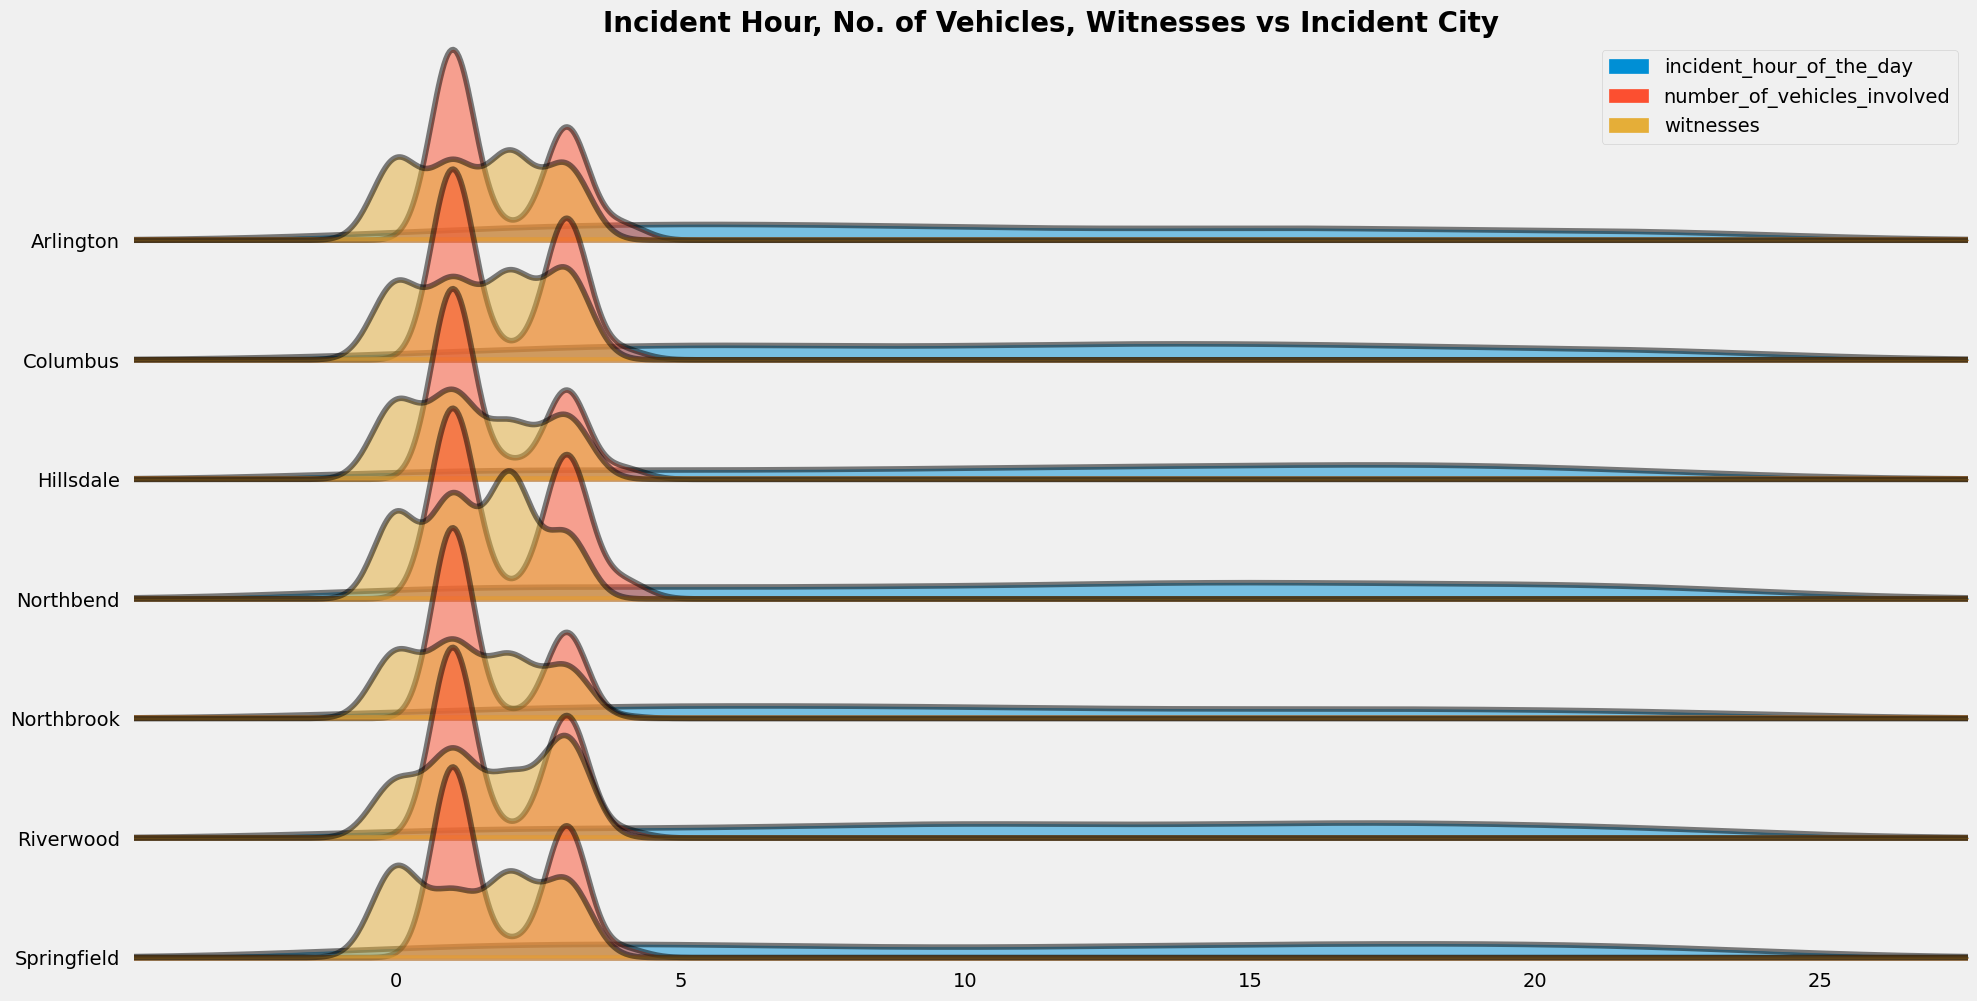

In [1106]:
# Improved Joyplot visualization with better structure and readability
fig, axes = joypy.joyplot(
    data,
    column=['incident_hour_of_the_day', 'number_of_vehicles_involved', 'witnesses'],
    by='incident_city',
    ylim='own',
    figsize=(20, 10),
    alpha=0.5,
    legend=True
)

# Centering and enhancing title readability
plt.title(
    'Incident Hour, No. of Vehicles, Witnesses vs Incident City',
    fontsize=20,
    fontweight='bold'
)

plt.show()

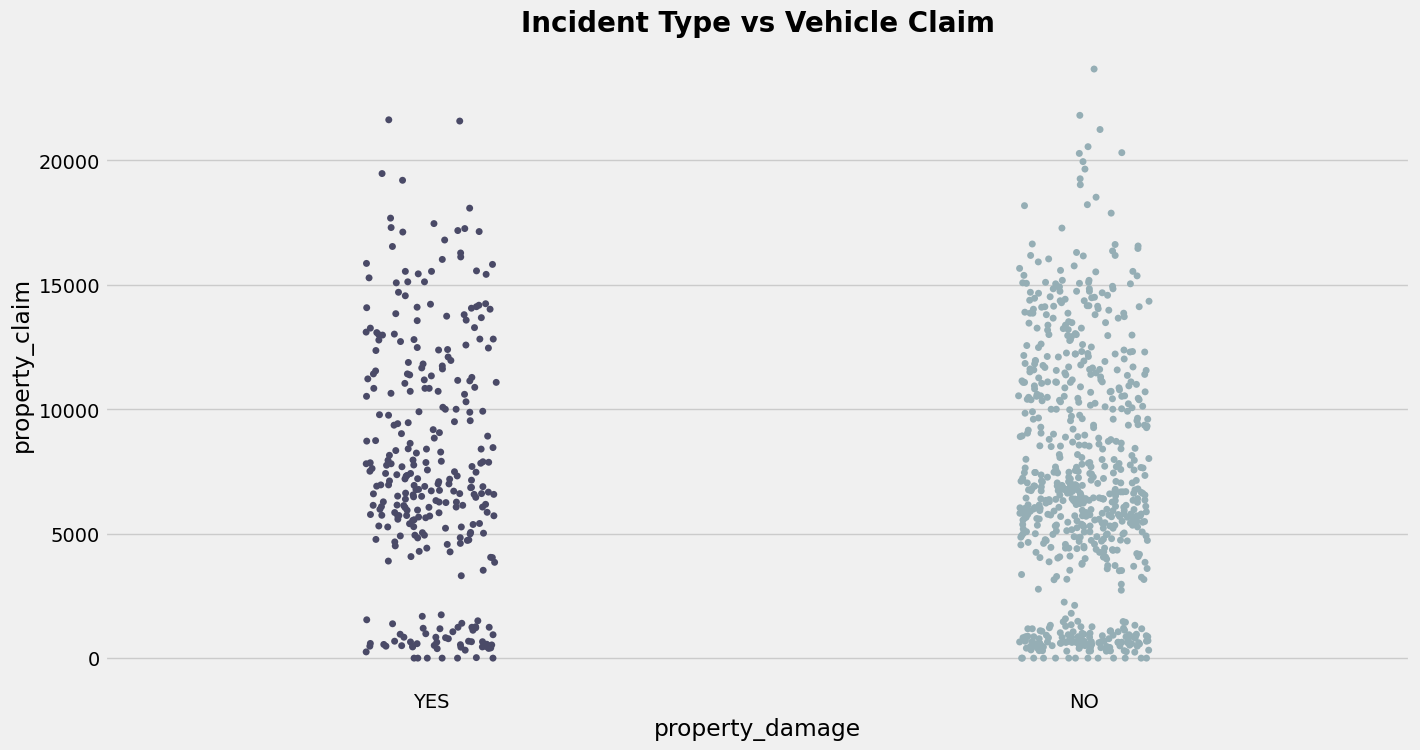

In [1107]:
# Set visualization style and figure size
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

# Create strip plot with improved formatting
sns.stripplot(
    x='property_damage',
    y='property_claim',
    data=data,
    palette='bone',
    jitter=True  # Adds slight randomness to prevent overlap
)

# Enhance title visibility
plt.title(
    'Incident Type vs Vehicle Claim',
    fontsize=20,
    fontweight='bold'
)

plt.show()

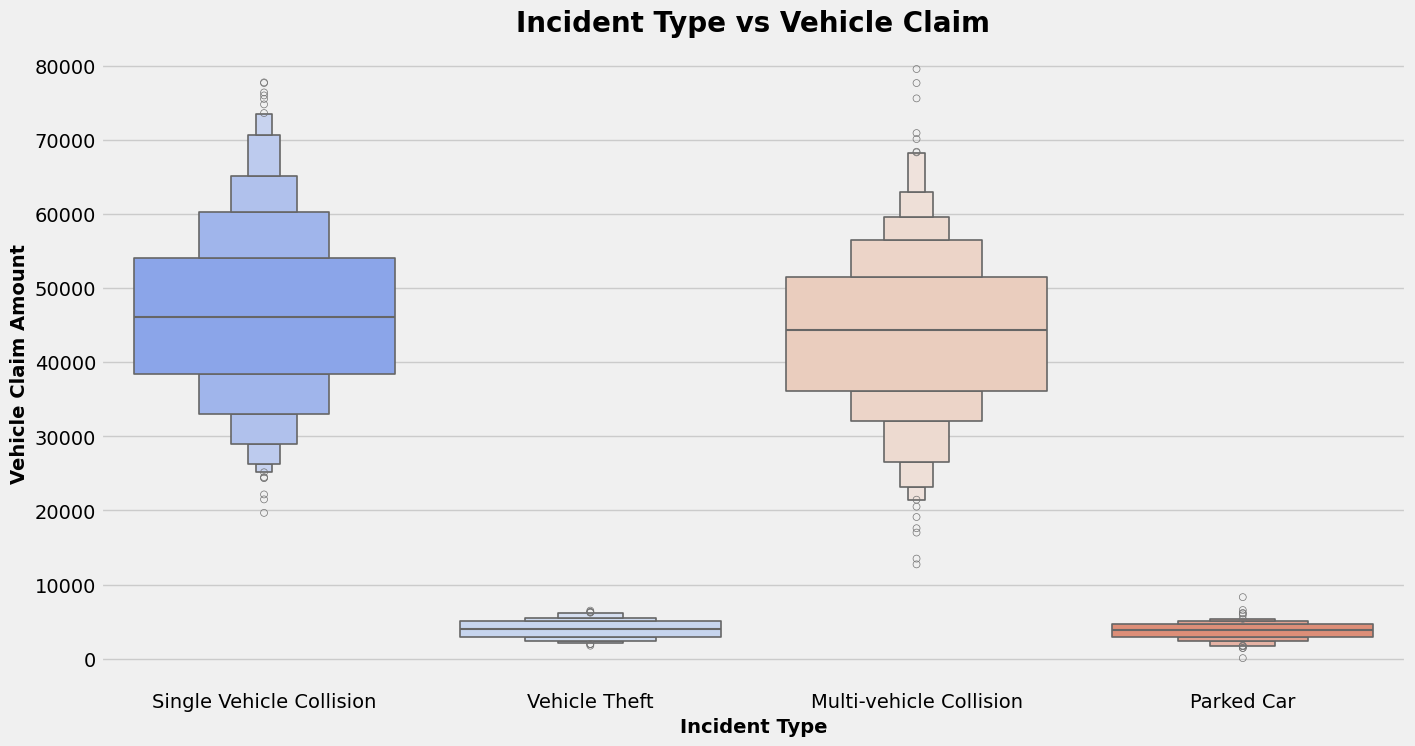

In [1108]:
# Set visualization style and figure size
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

# Create boxen plot with improved formatting
sns.boxenplot(
    x='incident_type',
    y='vehicle_claim',
    data=data,
    palette='coolwarm',  # Improved color contrast for readability
    linewidth=1.2  # Slightly enhance edge visibility
)

# Enhance title visibility
plt.title(
    'Incident Type vs Vehicle Claim',
    fontsize=20,
    fontweight='bold'
)

plt.xlabel('Incident Type', fontsize=14, fontweight='bold')  # Improve axis label visibility
plt.ylabel('Vehicle Claim Amount', fontsize=14, fontweight='bold')

plt.show()

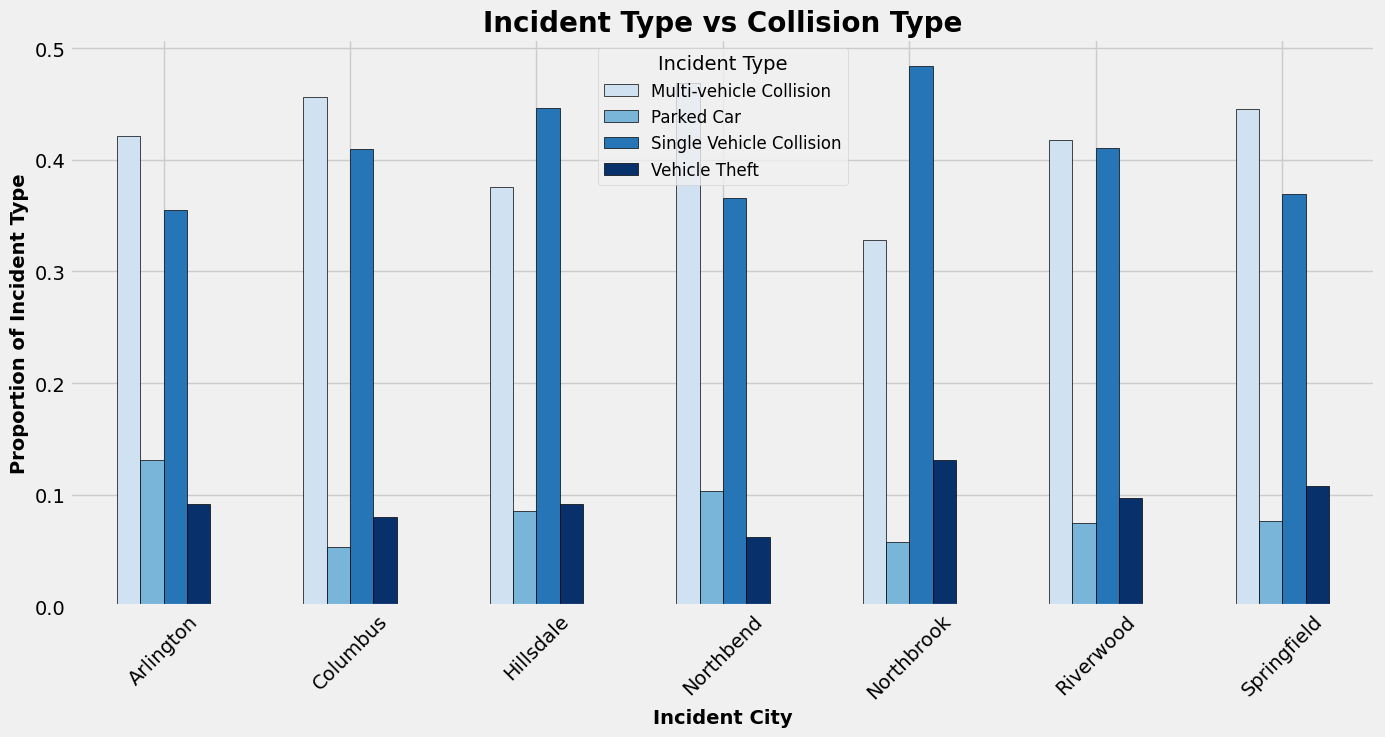

In [1109]:
# Compute the crosstab for incident city vs. incident type
incident = pd.crosstab(data['incident_city'], data['incident_type'])

# Define color mapping with improved contrast
colors = plt.cm.Blues(np.linspace(0.2, 1, len(incident.columns)))  # Dynamic color scaling

# Normalize data for better comparison
incident_normalized = incident.div(incident.sum(axis=1), axis=0)

# Create a bar plot with enhanced formatting
incident_normalized.plot(
    kind='bar',
    stacked=False,
    figsize=(15, 7),
    color=colors,
    edgecolor='black'  # Improve visibility
)

# Enhance title and legend formatting
plt.title('Incident Type vs Collision Type', fontsize=20, fontweight='bold')
plt.xlabel('Incident City', fontsize=14, fontweight='bold')
plt.ylabel('Proportion of Incident Type', fontsize=14, fontweight='bold')
plt.legend(title="Incident Type", fontsize=12)
plt.xticks(rotation=45)  # Rotate labels for better readability

plt.show()

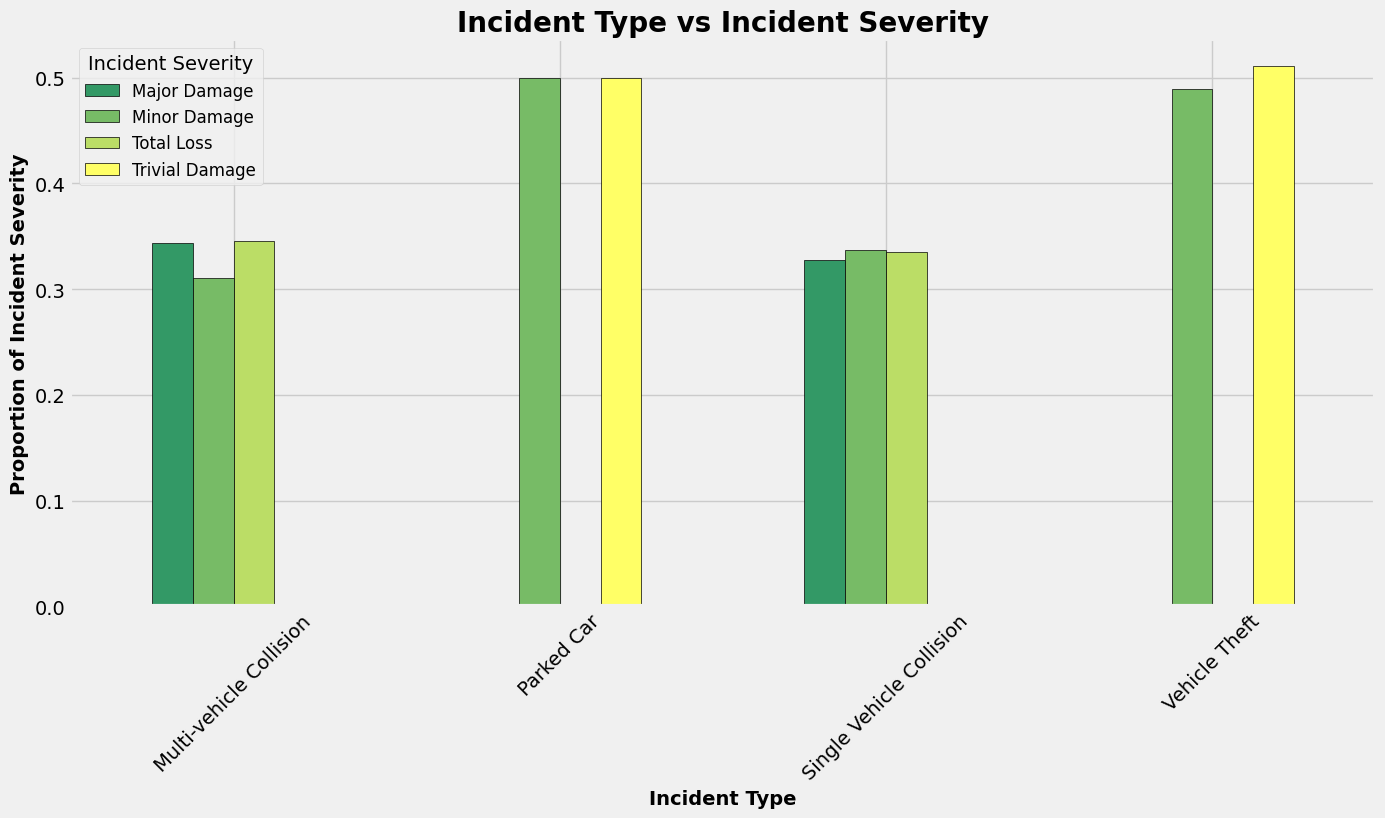

In [1110]:
# Compute the crosstab for incident type vs. incident severity
incident = pd.crosstab(data['incident_type'], data['incident_severity'])

# Define dynamic color mapping for better adaptability
colors = plt.cm.summer(np.linspace(0.2, 1, len(incident.columns)))  # Adjusted color scaling

# Normalize the data for better comparison across incident types
incident_normalized = incident.div(incident.sum(axis=1), axis=0)

# Create bar plot with enhanced formatting
incident_normalized.plot(
    kind='bar',
    stacked=False,
    figsize=(15, 7),
    color=colors,
    edgecolor='black'  # Improves visibility of bars
)

# Improve title, labels, and legend formatting
plt.title('Incident Type vs Incident Severity', fontsize=20, fontweight='bold')
plt.xlabel('Incident Type', fontsize=14, fontweight='bold')
plt.ylabel('Proportion of Incident Severity', fontsize=14, fontweight='bold')
plt.legend(title="Incident Severity", fontsize=12)
plt.xticks(rotation=45)  # Rotate labels for better readability

plt.show()

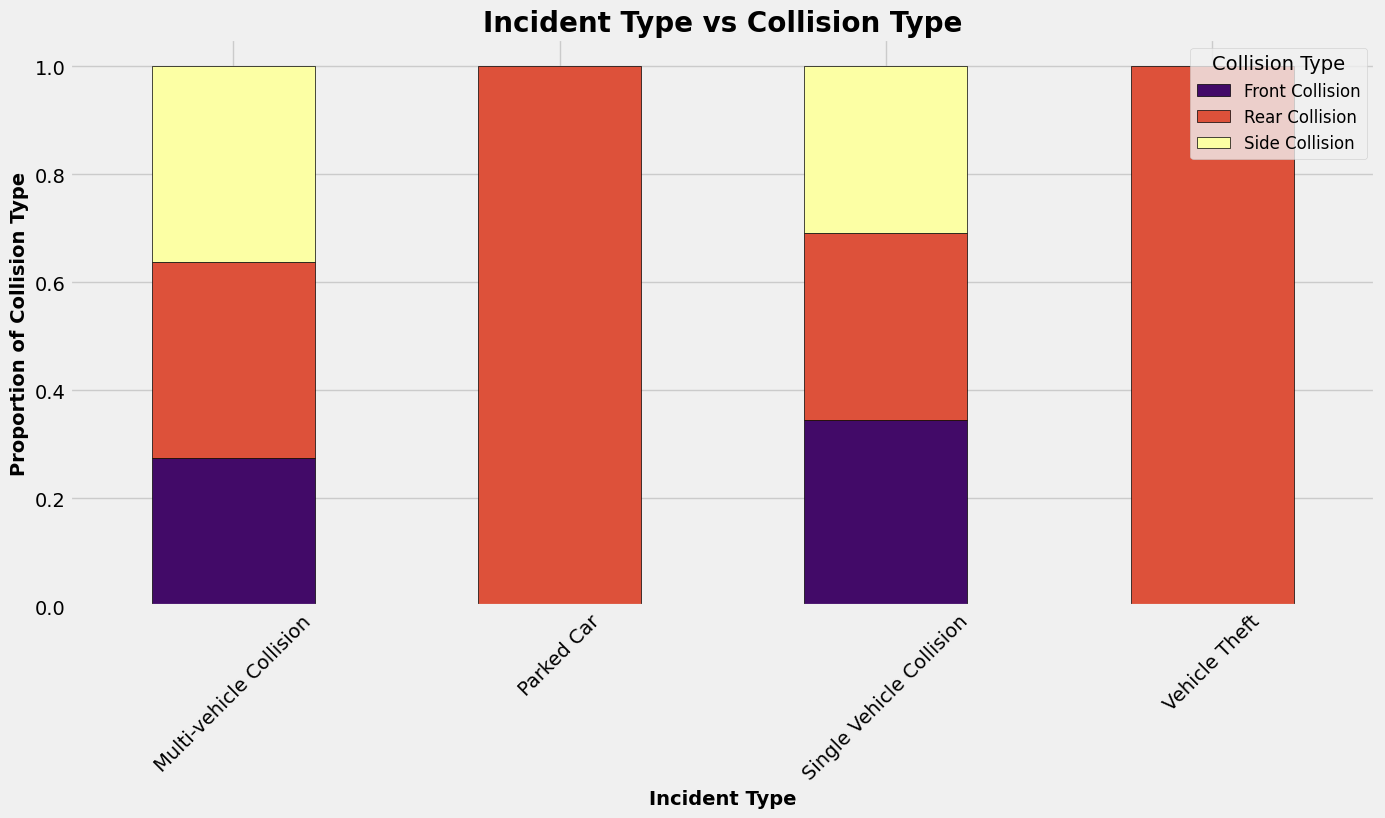

In [1111]:
# Compute the crosstab for incident type vs. collision type
incident = pd.crosstab(data['incident_type'], data['collision_type'])

# Define dynamic color mapping with better contrast
colors = plt.cm.inferno(np.linspace(0.2, 1, len(incident.columns)))  # Adjust color range dynamically

# Normalize values for proportional representation
incident_normalized = incident.div(incident.sum(axis=1), axis=0)

# Create a stacked bar plot with enhanced formatting
incident_normalized.plot(
    kind='bar',
    stacked=True,
    figsize=(15, 7),
    color=colors,
    edgecolor='black'  # Improves visibility
)

# Improve title and axis labels formatting
plt.title('Incident Type vs Collision Type', fontsize=20, fontweight='bold')
plt.xlabel('Incident Type', fontsize=14, fontweight='bold')
plt.ylabel('Proportion of Collision Type', fontsize=14, fontweight='bold')

# Enhance legend readability
plt.legend(title="Collision Type", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

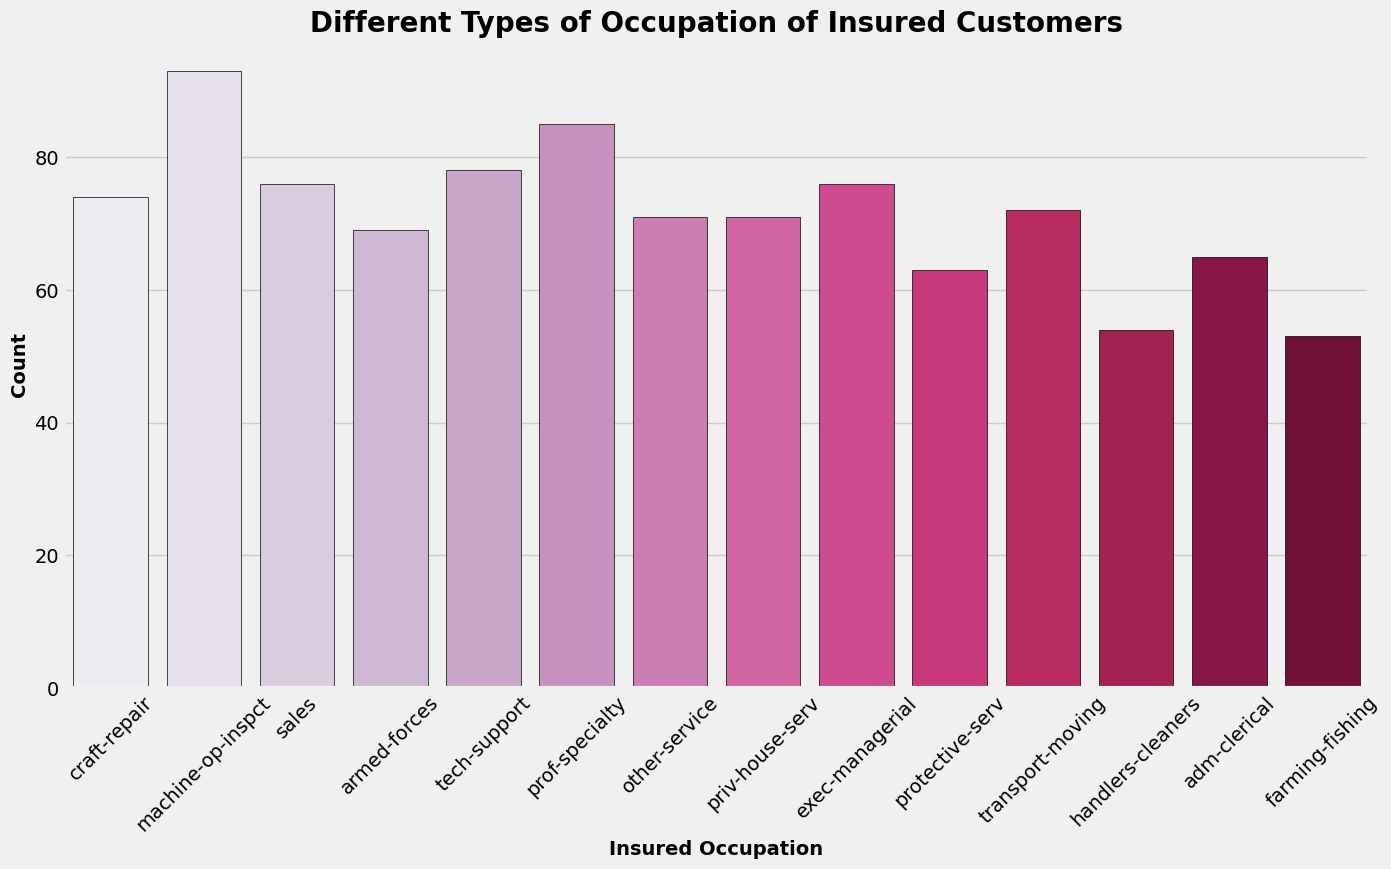

In [1112]:
# Set visualization style and figure size
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

# Create count plot with improved formatting
sns.countplot(
    x=data['insured_occupation'],
    palette='PuRd',
    edgecolor='black'  # Improves bar visibility
)

# Improve title and labels
plt.title('Different Types of Occupation of Insured Customers', fontsize=20, fontweight='bold')
plt.xlabel('Insured Occupation', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

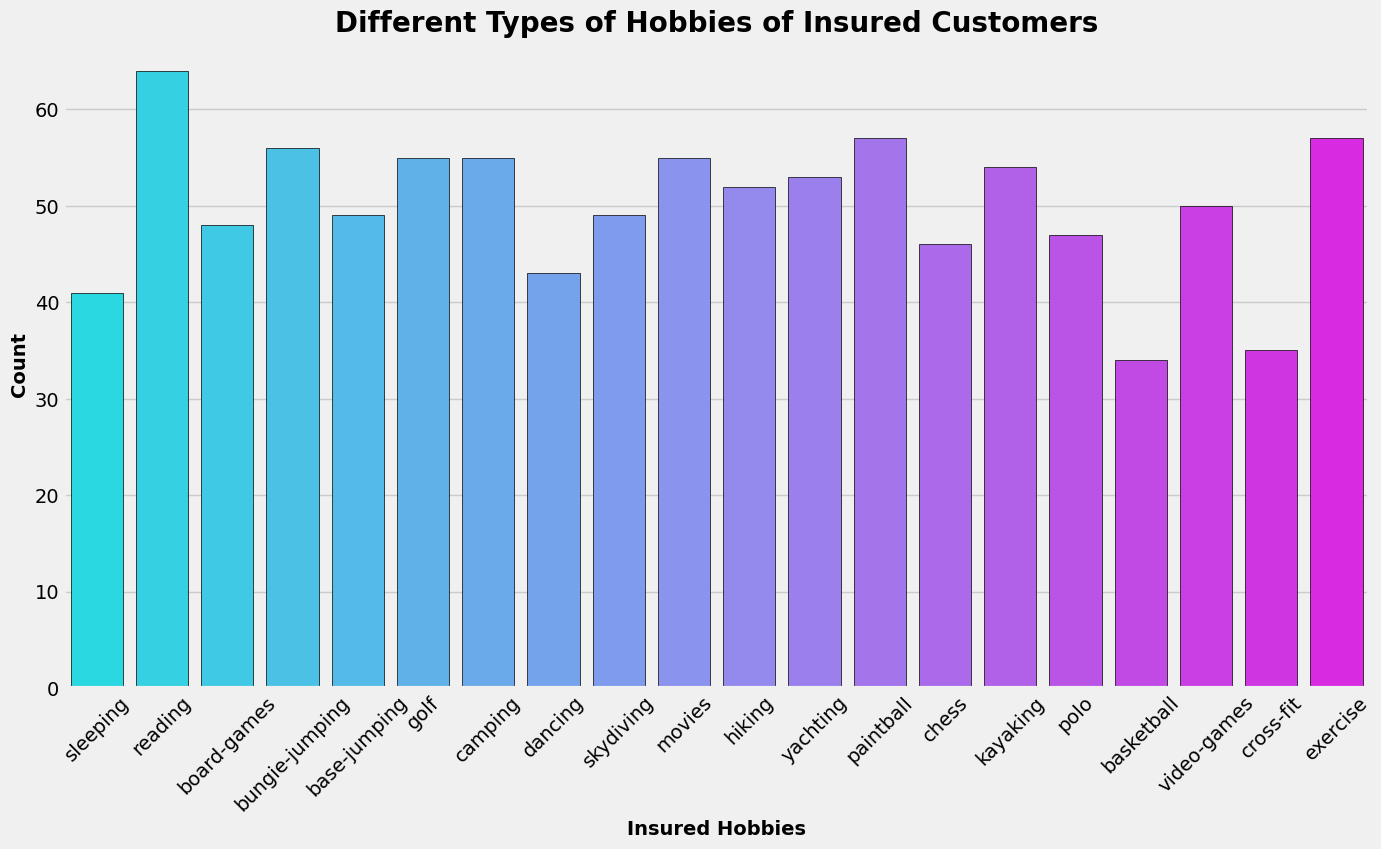

In [1113]:
# Set visualization style and figure size
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

# Create count plot with improved formatting
sns.countplot(
    x=data['insured_hobbies'],
    palette='cool',
    edgecolor='black'  # Enhances bar visibility
)

# Improve title and labels for better clarity
plt.title('Different Types of Hobbies of Insured Customers', fontsize=20, fontweight='bold')
plt.xlabel('Insured Hobbies', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

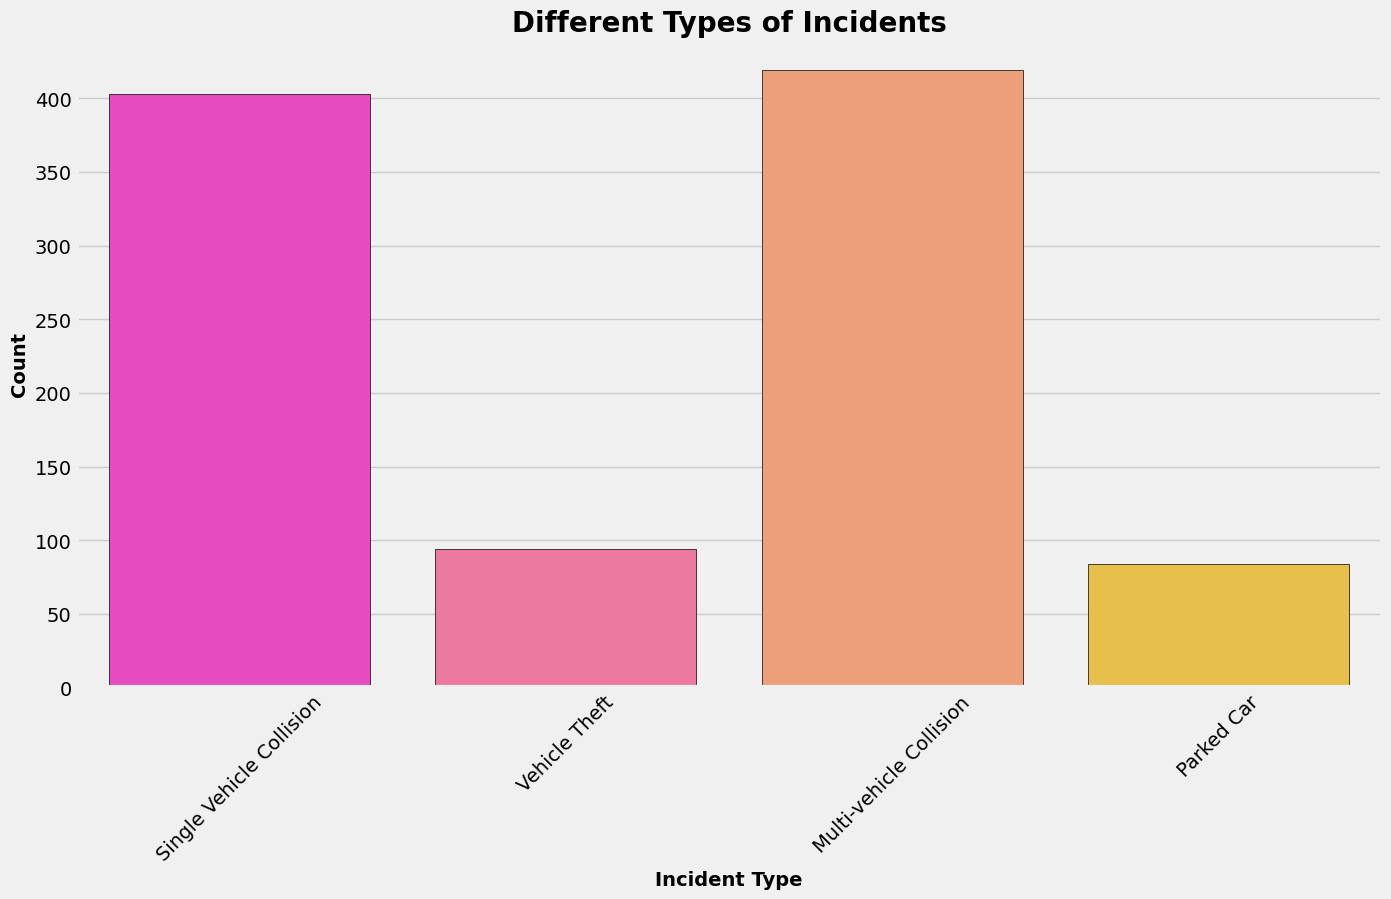

In [1114]:
# Set visualization style and figure size
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

# Create count plot with improved formatting
sns.countplot(
    x=data['incident_type'],
    palette='spring',
    edgecolor='black'  # Enhances bar definition
)

# Improve title and labels for better clarity
plt.title('Different Types of Incidents', fontsize=20, fontweight='bold')
plt.xlabel('Incident Type', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

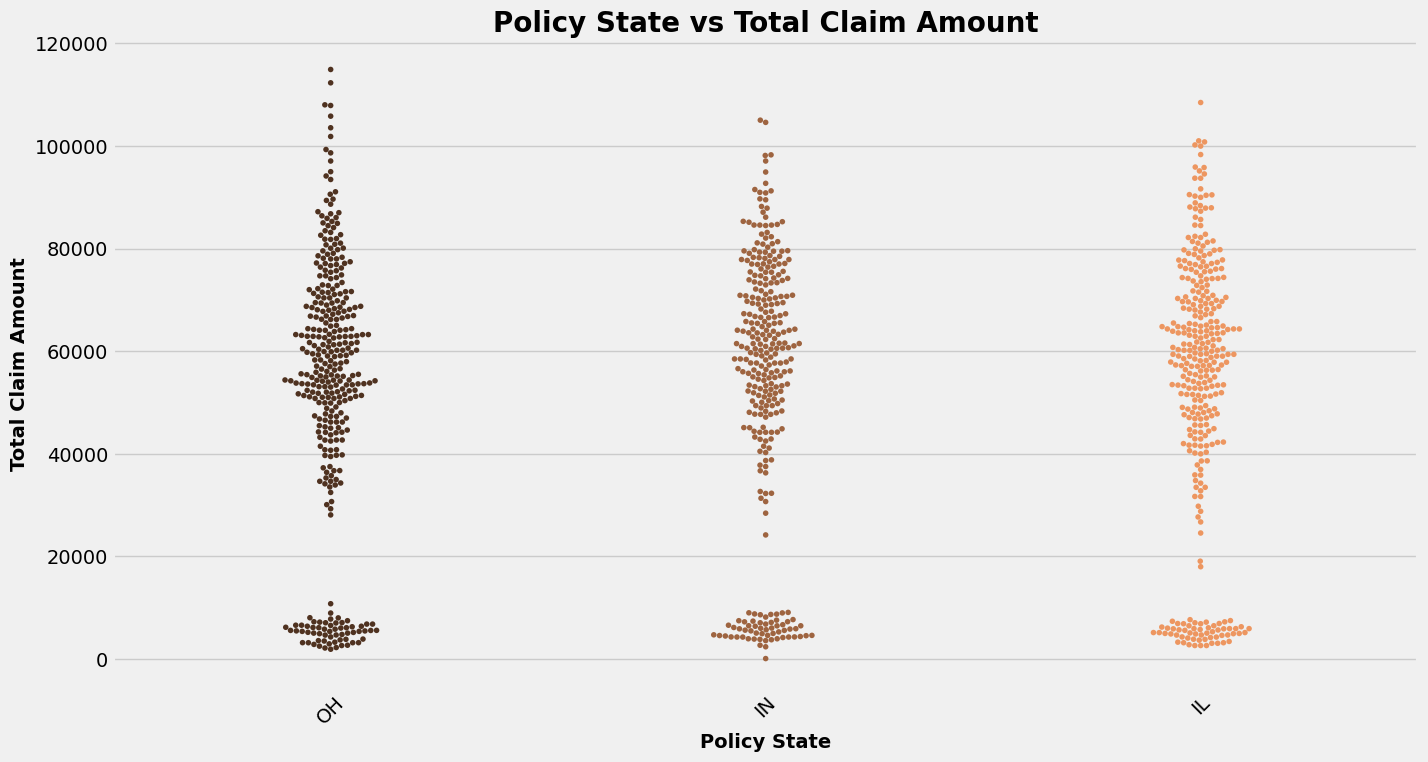

In [1115]:
# Set visualization style and figure size
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

# Create swarm plot with improved formatting
sns.swarmplot(
    x='policy_state',
    y='total_claim_amount',
    data=data,
    palette='copper',
    size=4  # Adjust point size for better visibility
)

# Improve title and labels for better clarity
plt.title('Policy State vs Total Claim Amount', fontsize=20, fontweight='bold')
plt.xlabel('Policy State', fontsize=14, fontweight='bold')
plt.ylabel('Total Claim Amount', fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

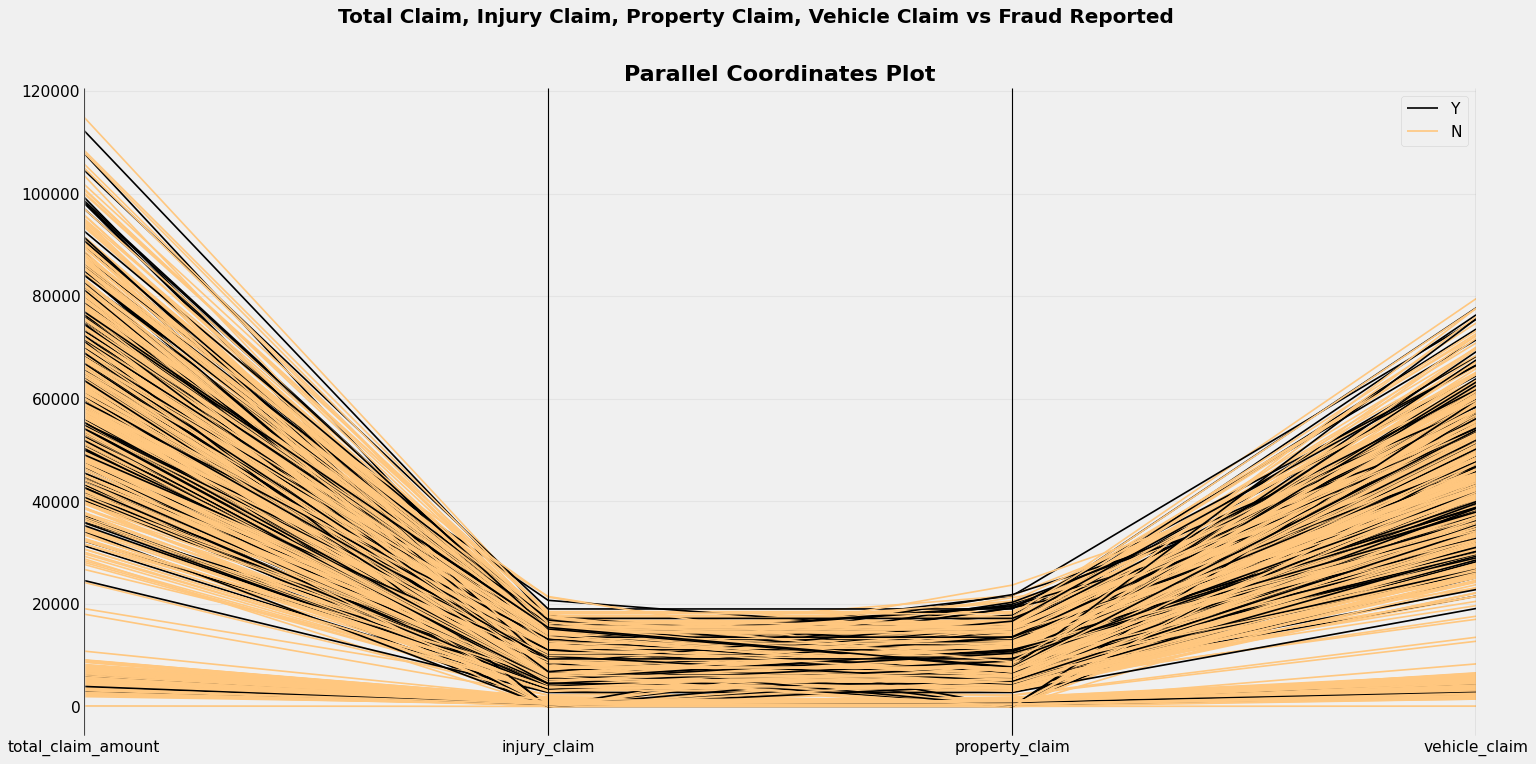

In [1116]:
# Set figure size and resolution
plt.figure(figsize=(20, 10), dpi=80)

# Create parallel coordinates plot with improved formatting
parallel_coordinates(
    data[['total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'fraud_reported']],
    class_column='fraud_reported',
    colormap='copper',
    linewidth=1.5  # Enhances line visibility
)

# Lighten borders for a cleaner look
for spine in ["top", "right"]:
    plt.gca().spines[spine].set_alpha(0)  # Remove top and right spines
for spine in ["bottom", "left"]:
    plt.gca().spines[spine].set_alpha(0.3)  # Lighten bottom and left spines

# Improve title formatting
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.suptitle('Total Claim, Injury Claim, Property Claim, Vehicle Claim vs Fraud Reported', fontsize=18, fontweight='bold')

# Add grid for better readability
plt.grid(alpha=0.3)

plt.show()

In [1117]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Create a bubble plot using Plotly Express
fig = px.scatter(
    data,
    x="policy_annual_premium",
    y="total_claim_amount",
    size="months_as_customer",
    color="insured_sex",
    animation_frame="auto_year",
    title="Annual Premium vs Total Claim Amount vs Months as Customer",
    labels={
        "policy_annual_premium": "Annual Policy Premium",
        "total_claim_amount": "Total Claim Amount"
    },
    height=650
)

# Improve marker scaling for better visualization
fig.update_traces(marker=dict(sizemode='area', opacity=0.7))

fig.show()

In [1118]:
# Create histogram trace with enhanced formatting
trace = go.Histogram(
    x=data['insured_education_level'],
    name='Education Level Distribution',
    opacity=0.75,
    marker=dict(
        color='rgba(195, 195, 145, 0.7)',  # Using 'rgba' for better transparency control
        line=dict(width=1, color='black')  # Adding border for better visibility
    )
)

# Define layout with improved clarity
layout = go.Layout(
    title='Education Level of Insured Customers',
    title_x=0.5,  # Center the title
    xaxis=dict(title='Insured Education Level'),
    yaxis=dict(title='Count'),
    bargap=0.2  # Adjust bar spacing for better readability
)

# Create and plot figure
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig)

In [1119]:
# Create histogram trace with improved formatting
trace = go.Histogram(
    x=data['insured_occupation'],
    name='Insured Occupation Distribution',
    opacity=0.75,
    marker=dict(
        color='rgba(15, 255, 185, 0.7)',  # Using 'rgba' for better transparency control
        line=dict(width=1, color='black')  # Adding border for better visibility
    )
)

# Define layout with enhanced clarity
layout = go.Layout(
    title='Distribution of Insured Customers by Occupation',
    title_x=0.5,  # Centering the title
    xaxis=dict(title='Insured Occupation'),
    yaxis=dict(title='Count'),
    bargap=0.2  # Adjust bar spacing for improved readability
)

# Create and plot figure
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig)

In [1120]:
# Compute value counts for gender and relationship categories
sex_counts = data['insured_sex'].value_counts()
rel_counts = data['insured_relationship'].value_counts()

# Define labels and values
labels_sex, sizes_sex = sex_counts.index, sex_counts.values
labels_rel, sizes_rel = rel_counts.index, rel_counts.values

# Define color schemes for better contrast
colors_sex = ['aqua', 'gold']
colors_rel = ['pink', 'lightblue', 'lightgreen', 'grey', 'red']

# Create Pie charts
trace_sex = go.Pie(
    labels=labels_sex, 
    values=sizes_sex, 
    marker=dict(colors=colors_sex), 
    name='Gender', 
    hole=0.3
)

trace_rel = go.Pie(
    labels=labels_rel, 
    values=sizes_rel, 
    marker=dict(colors=colors_rel), 
    name='Relationship', 
    hole=0.3
)

# Define layouts with better formatting
layout_sex = go.Layout(title='Gender Distribution of Insured Customers', title_x=0.5)
layout_rel = go.Layout(title='Relationship Distribution of Insured Customers', title_x=0.5)

# Create figures and plot
fig_sex = go.Figure(data=[trace_sex], layout=layout_sex)
fig_rel = go.Figure(data=[trace_rel], layout=layout_rel)

py.iplot(fig_sex)
py.iplot(fig_rel)

In [1121]:
# Create violin plot trace with better formatting
trace = go.Violin(
    x=data['insured_sex'],
    y=data['insured_zip'],
    name='Gender vs Insured Zip',
    opacity=0.75,
    marker=dict(
        color='rgba(215, 5, 185, 0.7)',  # Using 'rgba' for better transparency control
        line=dict(width=1, color='black')  # Adding border for better visibility
    ),
    box=dict(visible=True),  # Show box plot inside violin for more insights
    meanline=dict(visible=True)  # Show mean line for better interpretation
)

# Define layout with improved clarity
layout = go.Layout(
    title='Gender vs Insured Zip Distribution',
    title_x=0.5,  # Center the title
    xaxis=dict(title='Insured Sex'),
    yaxis=dict(title='Insured ZIP Code'),
    violinmode='group'  # Better grouping of categories
)

# Create and plot figure
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig)

In [1122]:
# Create box plot trace with enhanced formatting
trace = go.Box(
    x=data['auto_make'],
    y=data['vehicle_claim'],
    opacity=0.7,
    marker=dict(
        color='rgba(215, 195, 5, 0.7)',  # Using 'rgba' for better transparency control
        line=dict(width=1, color='black')  # Adding border for better visibility
    ),
    boxmean=True  # Display mean in the box plot for additional insights
)

# Define layout with improved clarity
layout = go.Layout(
    title='Automobile Company vs Vehicle Claim Amount',
    title_x=0.5,  # Center the title
    xaxis=dict(title='Automobile Company'),
    yaxis=dict(title='Vehicle Claim Amount'),
    boxmode='group'  # Improve grouping of box plots
)

# Create and plot figure
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig)

In [1123]:
# Create histogram trace with improved formatting
trace = go.Histogram(
    x=data['policy_annual_premium'],
    marker=dict(
        color='rgba(100, 75, 25, 0.7)'  # Using 'rgba' for better transparency control
    ),
    opacity=0.75  # Enhancing visualization clarity
)

# Define layout with better axis titles
layout = go.Layout(
    title='Distribution of Annual Policy Premiums',
    title_x=0.5,  # Center the title
    xaxis=dict(title='Policy Annual Premium'),
    yaxis=dict(title='Count'),
    bargap=0.2  # Adjust bar spacing for improved readability
)

# Create and plot figure
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig)

In [1124]:
# Create histogram trace with enhanced formatting
trace = go.Histogram(
    x=data['age'],
    marker=dict(
        color='rgba(215, 245, 5, 0.7)'  # Using 'rgba' for better transparency control
    ),
    opacity=0.75  # Improves visualization clarity
)

# Define layout with corrected axis titles
layout = go.Layout(
    title='Age Distribution of Insured Customers',
    title_x=0.5,  # Center the title
    xaxis=dict(title='Age'),
    yaxis=dict(title='Count'),
    bargap=0.2  # Adjust bar spacing for better readability
)

# Create and plot figure
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig)

In [1125]:
# Create 3D scatter plot with enhanced formatting
trace = go.Scatter3d(
    x=data['age'],
    y=data['property_claim'],
    z=data['vehicle_claim'],
    mode='markers',
    marker=dict(
        size=8,  # Adjusted marker size for better visibility
        color=data['age'],  # Coloring based on age
        colorscale='Viridis',  # Improved color scheme for better contrast
        opacity=0.8  # Slight transparency to enhance visibility
    )
)

# Define layout with corrected labels and better aesthetics
layout = go.Layout(
    title='Age vs Property Claim vs Vehicle Claim',
    title_x=0.5,  # Centering the title
    margin=dict(l=0, r=0, b=0, t=40),  # Adjusted top margin for title visibility
    scene=dict(
        xaxis=dict(title='Age'),
        yaxis=dict(title='Property Claim Amount'),
        zaxis=dict(title='Vehicle Claim Amount')
    )
)

# Create and plot figure
fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig)

## Data Processing

In [1126]:
# Convert to datetime and extract components
data['policy_bind_date'] = pd.to_datetime(data['policy_bind_date'], errors='coerce')

# Extract day, month, and year into separate columns
data['policy_bind_day'] = data['policy_bind_date'].dt.day
data['policy_bind_month'] = data['policy_bind_date'].dt.month
data['policy_bind_year'] = data['policy_bind_date'].dt.year

In [1127]:
# Encode fraud_reported (Y -> 1, N -> 0)
data['fraud_reported'] = data['fraud_reported'].replace({'Y': 1, 'N': 0})

# Check the distribution of values
print(data['fraud_reported'].value_counts())

fraud_reported
0    753
1    247
Name: count, dtype: int64


In [1128]:
# let's check the correlation of authorities_contacted with the target

data[['auto_model','fraud_reported']].groupby(['auto_model'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

auto_model  fraud_reported
38              X6        0.437500
32       Silverado        0.409091
24           ML350        0.400000
7             C300        0.388889
34           Tahoe        0.375000
14            F150        0.370370
10           Civic        0.363636
5               A5        0.343750
22              M5        0.333333
30             RAM        0.325581
37              X5        0.304348
19         Impreza        0.300000
26          Maxima        0.291667
15       Forrestor        0.285714
16          Fusion        0.285714
1              92x        0.285714
20           Jetta        0.285714
28          Passat        0.272727
18      Highlander        0.272727
4               A3        0.270270
12            E400        0.259259
13          Escape        0.250000
17  Grand Cherokee        0.240000
6           Accord        0.230769
23             MDX        0.222222
2               93        0.200000
33              TL        0.200000
3               95        0.185185
27            Neon        0.162162
21          Legacy        0.156250
8              CRV        0.150000
11         Corolla        0.150000
9            Camry        0.142857
35          Ultima        0.130435
29      Pathfinder        0.129032
36        Wrangler        0.119048
25          Malibu        0.100000
31             RSX        0.083333
0         3 Series        0.055556

In [1129]:
# let's perform target encoding for auto make

data['auto_make'] = data['auto_make'].replace(('3 Series','RSX','Malibu','Wrangler','Pathfinder','Ultima','Camry',
                'Corolla','CRV','Legacy','Neon','95','TL','93','MDX','Accord','Grand Cherokee','Escape','E4000',
            'A3','Highlander','Passat','92x','Jetta','Fusion','Forrestor','Maxima','Impreza','X5','RAM','M5','A5',
                'Civic','F150','Tahaoe','C300','ML350','Silverado','X6'),
                (0.95,0.91, 0.90,0.88,0.87,0.86,0.855,0.85,0.85,0.84,0.83,0.81,0.80,0.80,0.78,0.77,0.76,0.75,0.74,
                 0.73,0.72,0.72,0.71,0.71,0.71,0.71,0.70,0.70,0.69,0.67,0.66,0.65,0.64,0.63,0.62,0.61,0.60,0.59,0.56))


In [1130]:
# let's check the correlation auto make with the target

data[['auto_make','fraud_reported']].groupby(['auto_make'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

auto_make  fraud_reported
8     Mercedes        0.338462
5         Ford        0.305556
1         Audi        0.304348
13  Volkswagen        0.279412
2          BMW        0.277778
3    Chevrolet        0.276316
6        Honda        0.254545
4        Dodge        0.250000
11      Suburu        0.237500
10        Saab        0.225000
0       Accura        0.191176
12      Toyota        0.185714
9       Nissan        0.179487
7         Jeep        0.164179

In [1131]:
# Compute mean fraud probability for each auto_make category
fraud_mean_map = data.groupby('auto_make')['fraud_reported'].mean()

# Apply target encoding
data['auto_make_encoded'] = data['auto_make'].map(fraud_mean_map)

# Check encoding results
print(data[['auto_make', 'auto_make_encoded']].head())

   auto_make  auto_make_encoded
0       Saab           0.225000
1   Mercedes           0.338462
2      Dodge           0.250000
3  Chevrolet           0.276316
4     Accura           0.191176


In [1132]:
# # Compute correlation between 'authorities_contacted' and 'fraud_reported'
# correlation = data[['authorities_contacted', 'fraud_reported']].corr()
# print(correlation)

In [1133]:
# Mean fraud rate for each category in 'authorities_contacted'
data.groupby('authorities_contacted', as_index=False)['fraud_reported'].mean().sort_values(by='fraud_reported', ascending=False)

authorities_contacted  fraud_reported
2                 Other        0.318182
0             Ambulance        0.290816
1                  Fire        0.269058
3                Police        0.208904

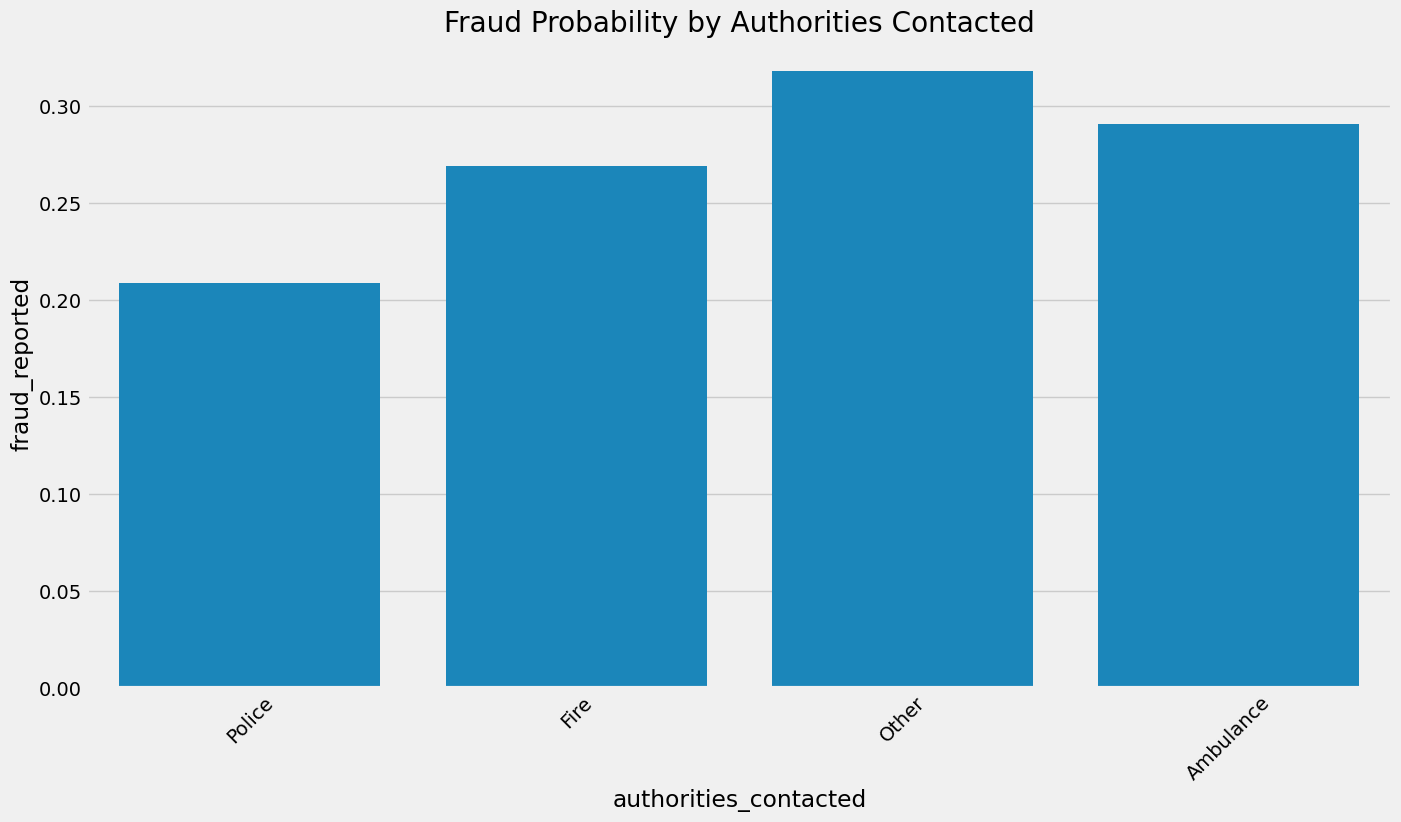

In [1134]:
sns.barplot(x='authorities_contacted', y='fraud_reported', data=data, estimator=lambda x: x.mean(), ci=None)
plt.title("Fraud Probability by Authorities Contacted")
plt.xticks(rotation=45)
plt.show()

In [1135]:
# let's check the correlation of authorities_contacted with the target

data[['police_report_available','fraud_reported']].groupby(['police_report_available'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

police_report_available  fraud_reported
0                      NO        0.255102
1                     YES        0.229299

In [1136]:
# Compute mean fraud probability for property_damage categories
fraud_mean_map = data.groupby('property_damage')['fraud_reported'].mean()

# Apply target encoding
data['property_damage_encoded'] = data['property_damage'].map(fraud_mean_map)

# Check encoding results
print(data[['property_damage', 'property_damage_encoded']].head())

  property_damage  property_damage_encoded
0             YES                 0.258278
1              NO                 0.242120
2              NO                 0.242120
3              NO                 0.242120
4              NO                 0.242120


In [1137]:
# # Compute Pearson correlation
# correlation = data[['property_damage', 'fraud_reported']].corr()
# print(correlation)

In [1138]:
data.groupby('property_damage', as_index=False)['fraud_reported'].mean().sort_values(by='fraud_reported', ascending=False)

property_damage  fraud_reported
1             YES        0.258278
0              NO        0.242120

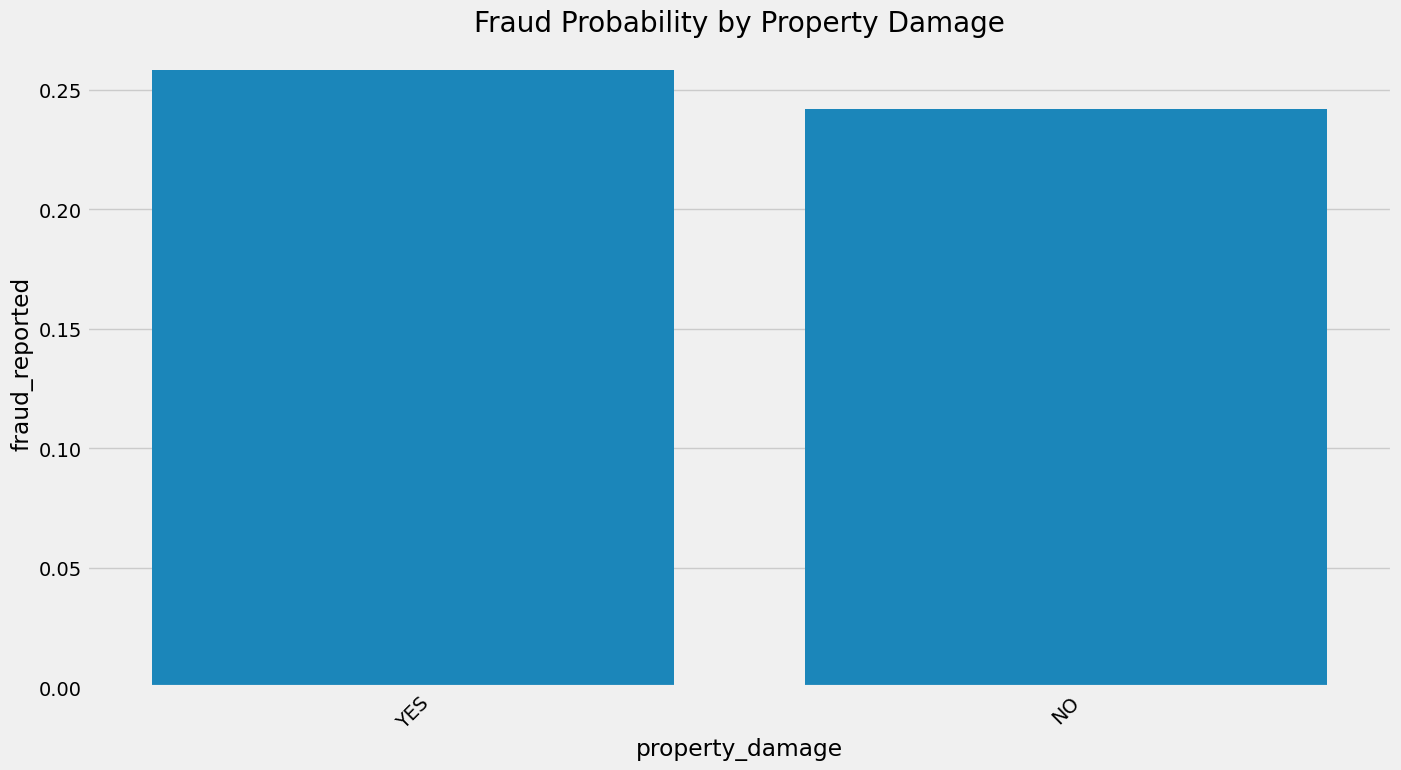

In [1139]:
sns.barplot(x='property_damage', y='fraud_reported', data=data, estimator=lambda x: x.mean(), ci=None)
plt.title("Fraud Probability by Property Damage")
plt.xticks(rotation=45)
plt.show()

In [1140]:
# let's check the correlation of authorities_contacted with the target

data[['property_damage','fraud_reported']].groupby(['property_damage'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

property_damage  fraud_reported
1             YES        0.258278
0              NO        0.242120

In [1141]:
# Compute mean fraud probability for each category of 'property_damage'
fraud_mean_map = data.groupby('property_damage')['fraud_reported'].mean()

# Apply target encoding
data['property_damage_encoded'] = data['property_damage'].map(fraud_mean_map)

# Check encoding results
print(data[['property_damage', 'property_damage_encoded']].head())

  property_damage  property_damage_encoded
0             YES                 0.258278
1              NO                 0.242120
2              NO                 0.242120
3              NO                 0.242120
4              NO                 0.242120


In [1142]:
# correlation = data[['authorities_contacted', 'fraud_reported']].corr()
# print(correlation)

In [1143]:
data.groupby('incident_city', as_index=False)['fraud_reported'].mean().sort_values(by='fraud_reported', ascending=False)

incident_city  fraud_reported
0     Arlington        0.289474
1      Columbus        0.261745
2     Hillsdale        0.248227
6   Springfield        0.242038
3     Northbend        0.234483
5     Riverwood        0.223881
4    Northbrook        0.221311

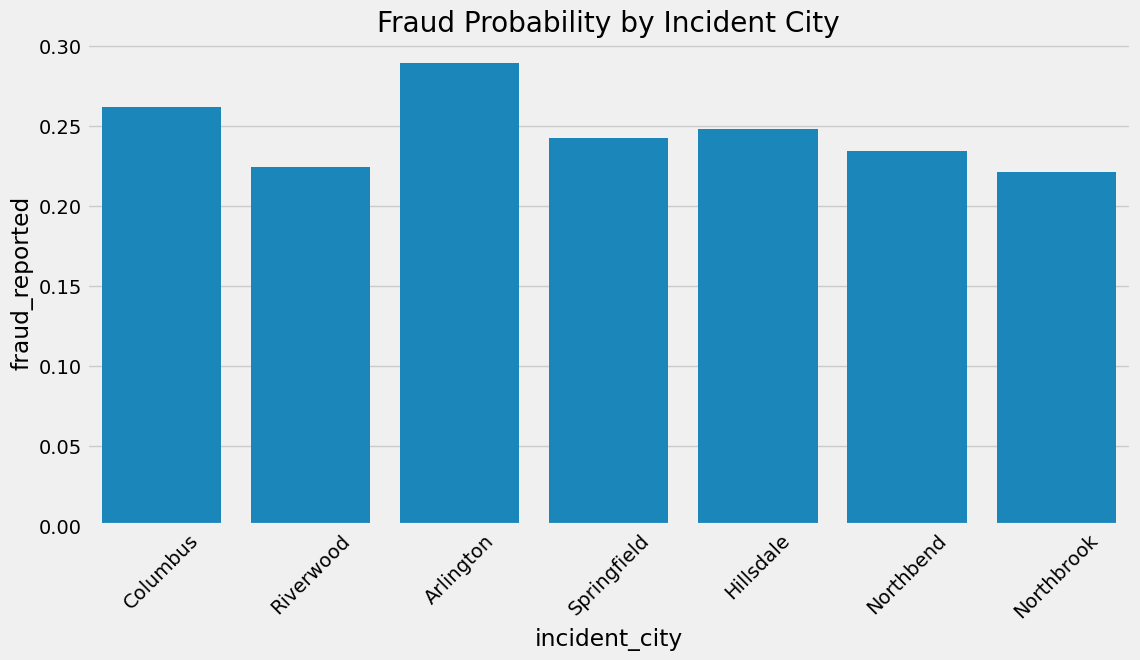

In [1144]:
plt.figure(figsize=(12, 6))
sns.barplot(x='incident_city', y='fraud_reported', data=data, estimator=lambda x: x.mean(), ci=None)
plt.xticks(rotation=45)
plt.title("Fraud Probability by Incident City")
plt.show()

In [1145]:
# let's check the correlation of authorities_contacted with the target

data[['incident_city','fraud_reported']].groupby(['incident_city'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

incident_city  fraud_reported
0     Arlington        0.289474
1      Columbus        0.261745
2     Hillsdale        0.248227
6   Springfield        0.242038
3     Northbend        0.234483
5     Riverwood        0.223881
4    Northbrook        0.221311

In [1146]:
# Compute mean fraud probability for each incident city
fraud_mean_map = data.groupby('incident_city')['fraud_reported'].mean()

# Apply target encoding
data['incident_city_encoded'] = data['incident_city'].map(fraud_mean_map)

# Verify encoding results
print(data[['incident_city', 'incident_city_encoded']].head())

  incident_city  incident_city_encoded
0      Columbus               0.261745
1     Riverwood               0.223881
2      Columbus               0.261745
3     Arlington               0.289474
4     Arlington               0.289474


In [1147]:
# correlation = data[['authorities_contacted', 'fraud_reported']].corr()
# print(correlation)

In [1148]:
data.groupby('incident_state', as_index=False)['fraud_reported'].mean().sort_values(by='fraud_reported', ascending=False)

incident_state  fraud_reported
2             OH        0.434783
0             NC        0.309091
4             SC        0.294355
3             PA        0.266667
5             VA        0.227273
1             NY        0.221374
6             WV        0.179724

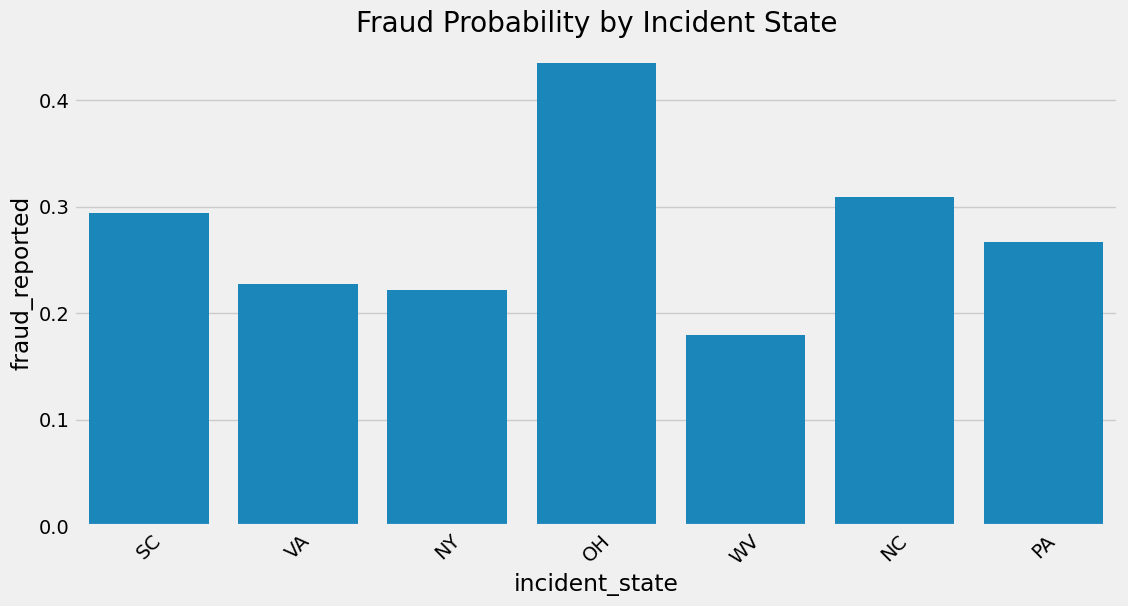

In [1149]:
plt.figure(figsize=(12, 6))
sns.barplot(x='incident_state', y='fraud_reported', data=data, estimator=lambda x: x.mean(), ci=None)
plt.xticks(rotation=45)
plt.title("Fraud Probability by Incident State")
plt.show()

In [1150]:
# let's check the correlation of authorities_contacted with the target

data[['incident_state','fraud_reported']].groupby(['incident_state'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

incident_state  fraud_reported
2             OH        0.434783
0             NC        0.309091
4             SC        0.294355
3             PA        0.266667
5             VA        0.227273
1             NY        0.221374
6             WV        0.179724

In [1151]:
# Compute mean fraud probability for each incident state
fraud_mean_map = data.groupby('incident_state')['fraud_reported'].mean()

# Apply target encoding
data['incident_state_encoded'] = data['incident_state'].map(fraud_mean_map)

# Verify encoding results
print(data[['incident_state', 'incident_state_encoded']].head())

  incident_state  incident_state_encoded
0             SC                0.294355
1             VA                0.227273
2             NY                0.221374
3             OH                0.434783
4             NY                0.221374


In [1152]:
# correlation = data[['authorities_contacted', 'fraud_reported']].corr()
# print(correlation)

In [1153]:
data.groupby('authorities_contacted', as_index=False)['fraud_reported'].mean().sort_values(by='fraud_reported', ascending=False)

authorities_contacted  fraud_reported
2                 Other        0.318182
0             Ambulance        0.290816
1                  Fire        0.269058
3                Police        0.208904

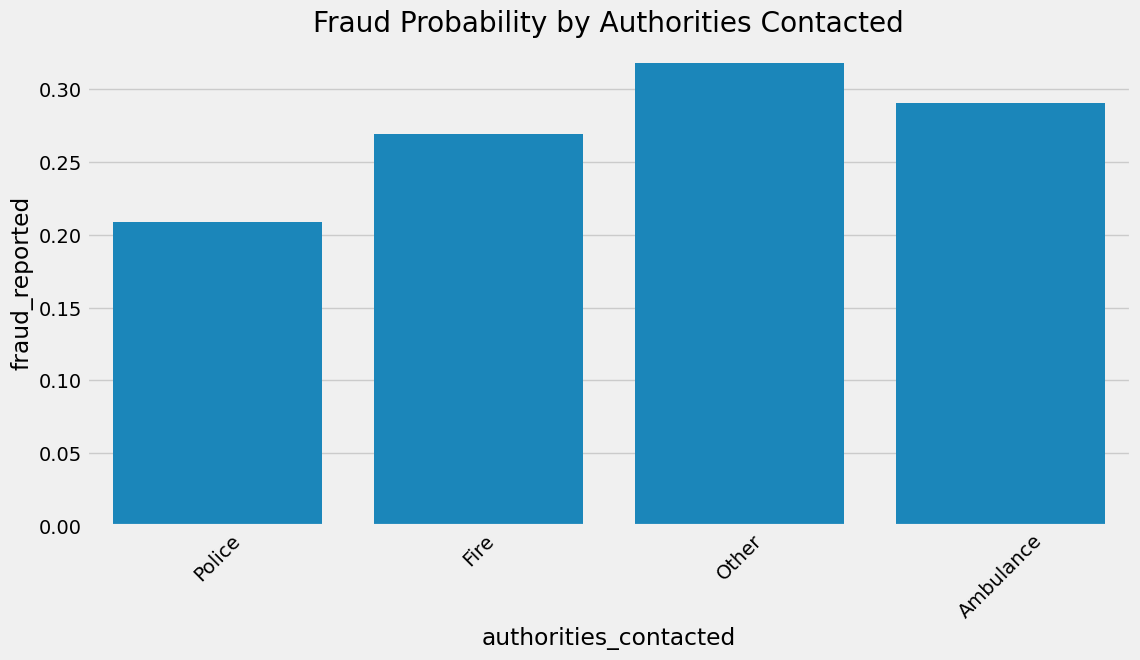

In [1154]:
plt.figure(figsize=(12, 6))
sns.barplot(x='authorities_contacted', y='fraud_reported', data=data, estimator=lambda x: x.mean(), ci=None)
plt.xticks(rotation=45)
plt.title("Fraud Probability by Authorities Contacted")
plt.show()

In [1155]:
# let's check the correlation of authorities_contacted with the target

data[['authorities_contacted','fraud_reported']].groupby(['authorities_contacted'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

authorities_contacted  fraud_reported
2                 Other        0.318182
0             Ambulance        0.290816
1                  Fire        0.269058
3                Police        0.208904

In [1156]:
# Compute mean fraud probability for each authorities_contacted category
fraud_mean_map = data.groupby('authorities_contacted')['fraud_reported'].mean()

# Apply target encoding
data['authorities_contacted_encoded'] = data['authorities_contacted'].map(fraud_mean_map)

# Verify encoding results
print(data[['authorities_contacted', 'authorities_contacted_encoded']].head())

  authorities_contacted  authorities_contacted_encoded
0                Police                       0.208904
1                Police                       0.208904
2                Police                       0.208904
3                Police                       0.208904
4                   NaN                            NaN


In [1157]:
# correlation = data[['incident_severity', 'fraud_reported']].corr()
# print(correlation)

In [1158]:
data.groupby('incident_severity', as_index=False)['fraud_reported'].mean().sort_values(by='fraud_reported', ascending=False)

incident_severity  fraud_reported
0      Major Damage        0.605072
2        Total Loss        0.128571
1      Minor Damage        0.107345
3    Trivial Damage        0.066667

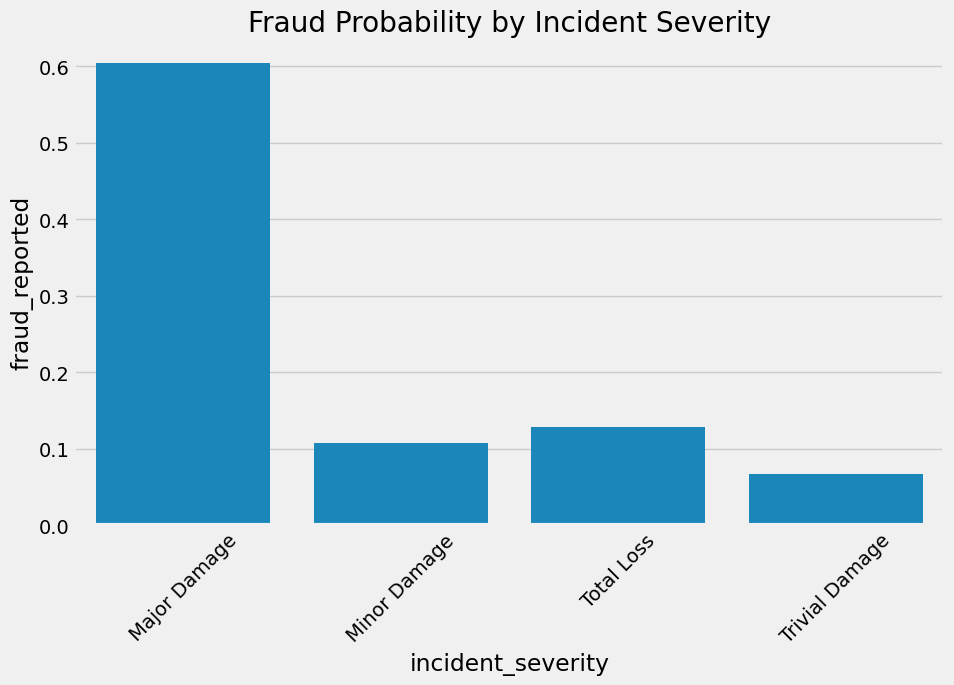

In [1159]:
plt.figure(figsize=(10, 6))
sns.barplot(x='incident_severity', y='fraud_reported', data=data, estimator=lambda x: x.mean(), ci=None)
plt.title("Fraud Probability by Incident Severity")
plt.xticks(rotation=45)
plt.show()

In [1160]:
# let's check the correlation of incident_severity with the target

data[['incident_severity','fraud_reported']].groupby(['incident_severity'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

incident_severity  fraud_reported
0      Major Damage        0.605072
2        Total Loss        0.128571
1      Minor Damage        0.107345
3    Trivial Damage        0.066667

In [1161]:
# Compute mean fraud probability for each incident severity category
fraud_mean_map = data.groupby('incident_severity')['fraud_reported'].mean()

# Apply target encoding
data['incident_severity_encoded'] = data['incident_severity'].map(fraud_mean_map)

# Verify encoding results
print(data[['incident_severity', 'incident_severity_encoded']].head())

  incident_severity  incident_severity_encoded
0      Major Damage                   0.605072
1      Minor Damage                   0.107345
2      Minor Damage                   0.107345
3      Major Damage                   0.605072
4      Minor Damage                   0.107345


In [1162]:
# correlation = data[['collision_type', 'fraud_reported']].corr()
# print(correlation)

In [1163]:
data.groupby('collision_type', as_index=False)['fraud_reported'].mean().sort_values(by='fraud_reported', ascending=False)

collision_type  fraud_reported
0  Front Collision        0.275591
2   Side Collision        0.253623
1   Rear Collision        0.227660

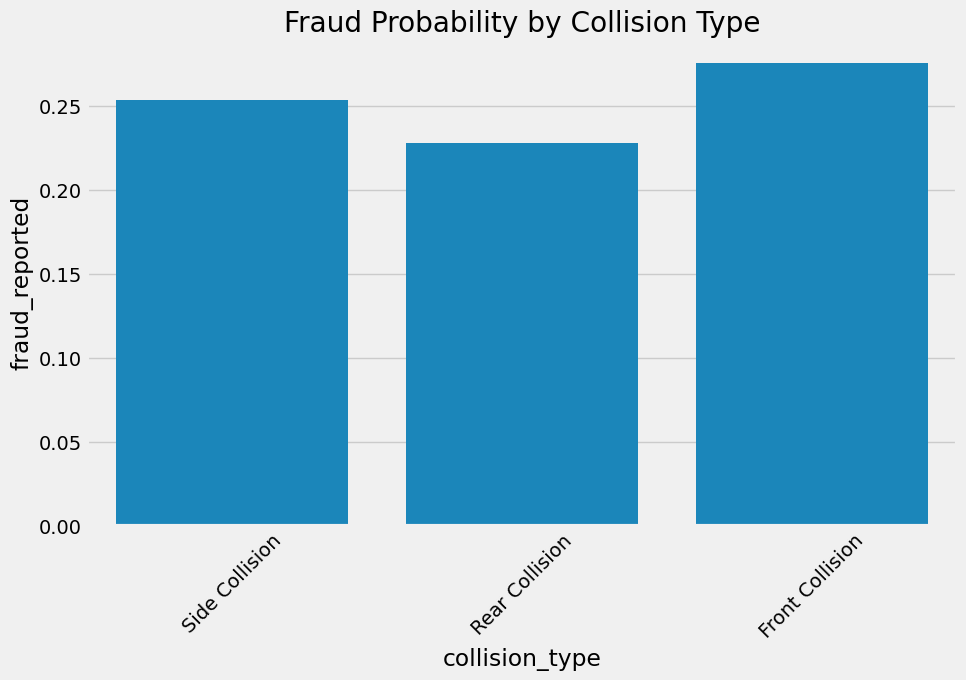

In [1164]:
plt.figure(figsize=(10, 6))
sns.barplot(x='collision_type', y='fraud_reported', data=data, estimator=lambda x: x.mean(), ci=None)
plt.xticks(rotation=45)
plt.title("Fraud Probability by Collision Type")
plt.show()

In [1165]:
# let's check the correlation of collision_type with the target

data[['collision_type','fraud_reported']].groupby(['collision_type'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

collision_type  fraud_reported
0  Front Collision        0.275591
2   Side Collision        0.253623
1   Rear Collision        0.227660

In [1166]:
# Compute mean fraud probability for each collision type category
fraud_mean_map = data.groupby('collision_type')['fraud_reported'].mean()

# Apply target encoding
data['collision_type_encoded'] = data['collision_type'].map(fraud_mean_map)

# Verify encoding results
print(data[['collision_type', 'collision_type_encoded']].head())

    collision_type  collision_type_encoded
0   Side Collision                0.253623
1   Rear Collision                0.227660
2   Rear Collision                0.227660
3  Front Collision                0.275591
4   Rear Collision                0.227660


In [1167]:
# correlation = data[['incident_type', 'fraud_reported']].corr()
# print(correlation)

In [1168]:
data.groupby('incident_type', as_index=False)['fraud_reported'].mean().sort_values(by='fraud_reported', ascending=False)

incident_type  fraud_reported
2  Single Vehicle Collision        0.290323
0   Multi-vehicle Collision        0.272076
1                Parked Car        0.095238
3             Vehicle Theft        0.085106

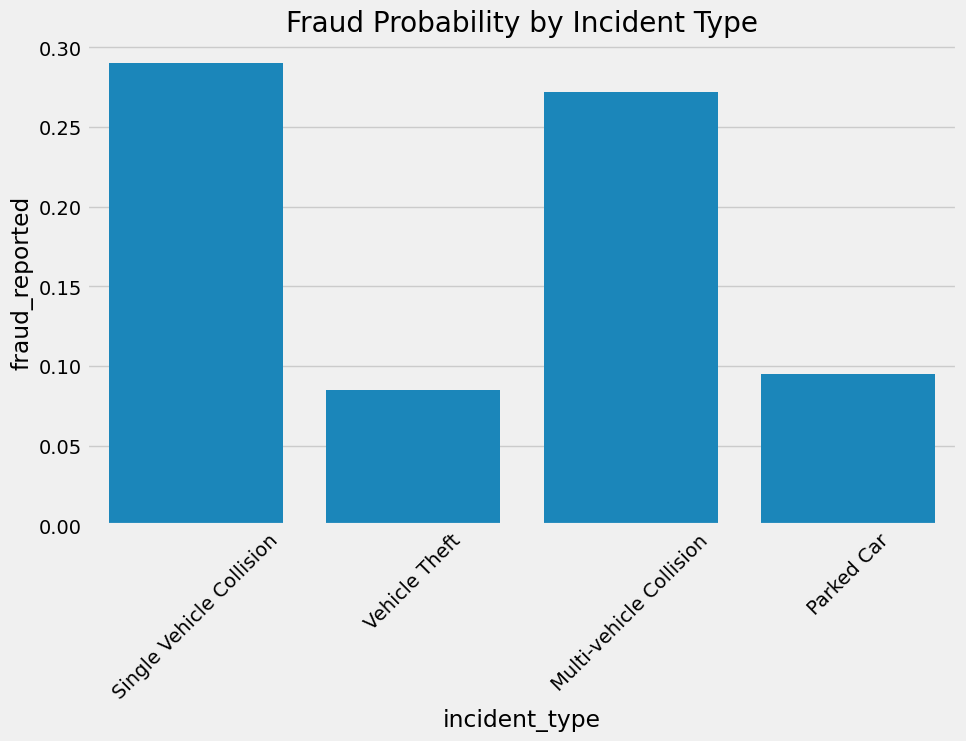

In [1169]:
plt.figure(figsize=(10, 6))
sns.barplot(x='incident_type', y='fraud_reported', data=data, estimator=lambda x: x.mean(), ci=None)
plt.xticks(rotation=45)
plt.title("Fraud Probability by Incident Type")
plt.show()

In [1170]:
# let's check the correlation of incident_type with the target

data[['incident_type','fraud_reported']].groupby(['incident_type'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

incident_type  fraud_reported
2  Single Vehicle Collision        0.290323
0   Multi-vehicle Collision        0.272076
1                Parked Car        0.095238
3             Vehicle Theft        0.085106

In [1171]:
# Compute mean fraud probability for each incident type category
fraud_mean_map = data.groupby('incident_type')['fraud_reported'].mean()

# Apply target encoding
data['incident_type_encoded'] = data['incident_type'].map(fraud_mean_map)

# Verify encoding results
print(data[['incident_type', 'incident_type_encoded']].head())

              incident_type  incident_type_encoded
0  Single Vehicle Collision               0.290323
1             Vehicle Theft               0.085106
2   Multi-vehicle Collision               0.272076
3  Single Vehicle Collision               0.290323
4             Vehicle Theft               0.085106


In [1172]:
# Convert to datetime format, handling errors gracefully
data['incident_date'] = pd.to_datetime(data['incident_date'], errors='coerce')

# Extract multiple components from date
data['incident_month'] = data['incident_date'].dt.month
data['incident_day'] = data['incident_date'].dt.day
data['incident_weekday'] = data['incident_date'].dt.day_name()  # Day of the week
data['incident_year'] = data['incident_date'].dt.year  # Year
data['incident_week'] = data['incident_date'].dt.isocalendar().week  # Week of the year

In [1173]:
# correlation = data[['insured_relationship', 'fraud_reported']].corr()
# print(correlation)

In [1174]:
data.groupby('insured_relationship', as_index=False)['fraud_reported'].mean().sort_values(by='fraud_reported', ascending=False)

insured_relationship  fraud_reported
2       other-relative        0.293785
5                 wife        0.270968
1        not-in-family        0.258621
4            unmarried        0.241135
3            own-child        0.213115
0              husband        0.205882

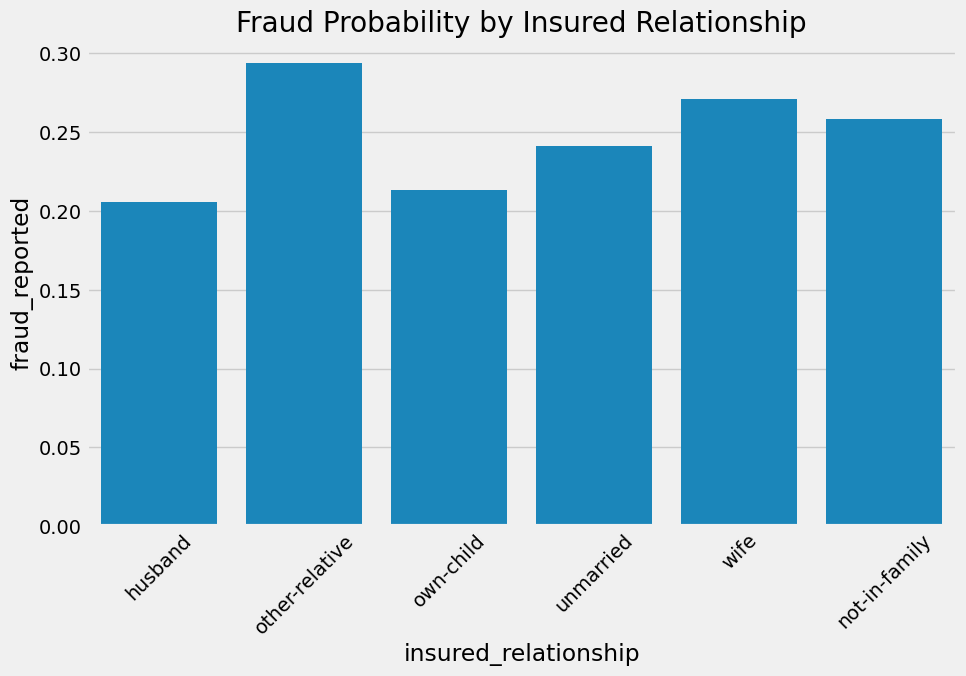

In [1175]:
plt.figure(figsize=(10, 6))
sns.barplot(x='insured_relationship', y='fraud_reported', data=data, estimator=lambda x: x.mean(), ci=None)
plt.xticks(rotation=45)
plt.title("Fraud Probability by Insured Relationship")
plt.show()


In [1176]:
# let's know the relation between insured_relationship and fraud reported

data[['insured_relationship','fraud_reported']].groupby(['insured_relationship'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

insured_relationship  fraud_reported
2       other-relative        0.293785
5                 wife        0.270968
1        not-in-family        0.258621
4            unmarried        0.241135
3            own-child        0.213115
0              husband        0.205882

In [1177]:
# Compute mean fraud probability for each insured relationship category
fraud_mean_map = data.groupby('insured_relationship')['fraud_reported'].mean()

# Apply target encoding
data['insured_relationship_encoded'] = data['insured_relationship'].map(fraud_mean_map)

# Verify encoding results
print(data[['insured_relationship', 'insured_relationship_encoded']].head())

  insured_relationship  insured_relationship_encoded
0              husband                      0.205882
1       other-relative                      0.293785
2            own-child                      0.213115
3            unmarried                      0.241135
4            unmarried                      0.241135


In [1178]:
data.groupby('insured_hobbies', as_index=False)['fraud_reported'].mean().sort_values(by='fraud_reported', ascending=False)

insured_hobbies  fraud_reported
5            chess        0.826087
6        cross-fit        0.742857
19        yachting        0.301887
2      board-games        0.291667
14            polo        0.276596
15         reading        0.265625
0     base-jumping        0.265306
10          hiking        0.230769
13       paintball        0.228070
16       skydiving        0.224490
18     video-games        0.200000
17        sleeping        0.195122
8         exercise        0.192982
1       basketball        0.176471
12          movies        0.163636
3   bungie-jumping        0.160714
7          dancing        0.116279
9             golf        0.109091
11        kayaking        0.092593
4          camping        0.090909

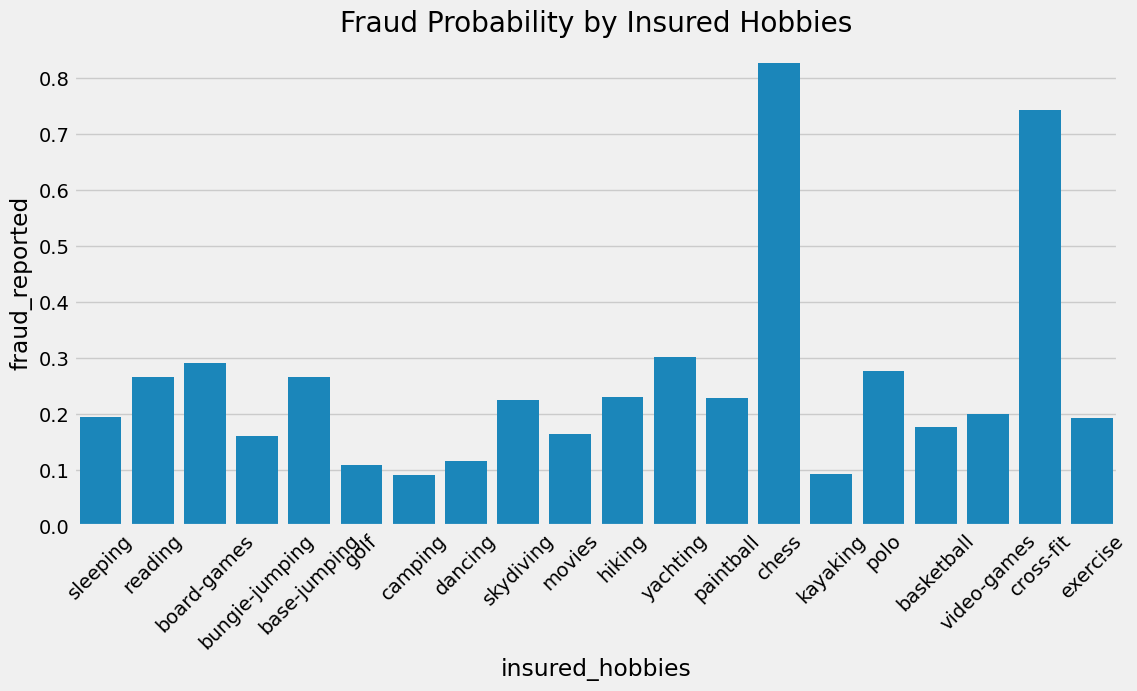

In [1179]:
plt.figure(figsize=(12, 6))
sns.barplot(x='insured_hobbies', y='fraud_reported', data=data, estimator=lambda x: x.mean(), ci=None)
plt.xticks(rotation=45)
plt.title("Fraud Probability by Insured Hobbies")
plt.show()

In [1180]:
# let's know the relation between insured_hobbies and fraud reported

data[['insured_hobbies','fraud_reported']].groupby(['insured_hobbies'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

insured_hobbies  fraud_reported
5            chess        0.826087
6        cross-fit        0.742857
19        yachting        0.301887
2      board-games        0.291667
14            polo        0.276596
15         reading        0.265625
0     base-jumping        0.265306
10          hiking        0.230769
13       paintball        0.228070
16       skydiving        0.224490
18     video-games        0.200000
17        sleeping        0.195122
8         exercise        0.192982
1       basketball        0.176471
12          movies        0.163636
3   bungie-jumping        0.160714
7          dancing        0.116279
9             golf        0.109091
11        kayaking        0.092593
4          camping        0.090909

In [1181]:
# Compute mean fraud probability for each insured hobbies category
fraud_mean_map = data.groupby('insured_hobbies')['fraud_reported'].mean()

# Apply target encoding
data['insured_hobbies_encoded'] = data['insured_hobbies'].map(fraud_mean_map)

# Verify encoding results
print(data[['insured_hobbies', 'insured_hobbies_encoded']].head())

  insured_hobbies  insured_hobbies_encoded
0        sleeping                 0.195122
1         reading                 0.265625
2     board-games                 0.291667
3     board-games                 0.291667
4     board-games                 0.291667


In [1182]:
data.groupby('insured_occupation', as_index=False)['fraud_reported'].mean().sort_values(by='fraud_reported', ascending=False)

insured_occupation  fraud_reported
3     exec-managerial        0.368421
4     farming-fishing        0.301887
2        craft-repair        0.297297
13   transport-moving        0.291667
12       tech-support        0.282051
11              sales        0.276316
1        armed-forces        0.246377
6   machine-op-inspct        0.236559
10    protective-serv        0.222222
9      prof-specialty        0.211765
5   handlers-cleaners        0.203704
0        adm-clerical        0.169231
7       other-service        0.169014
8     priv-house-serv        0.169014

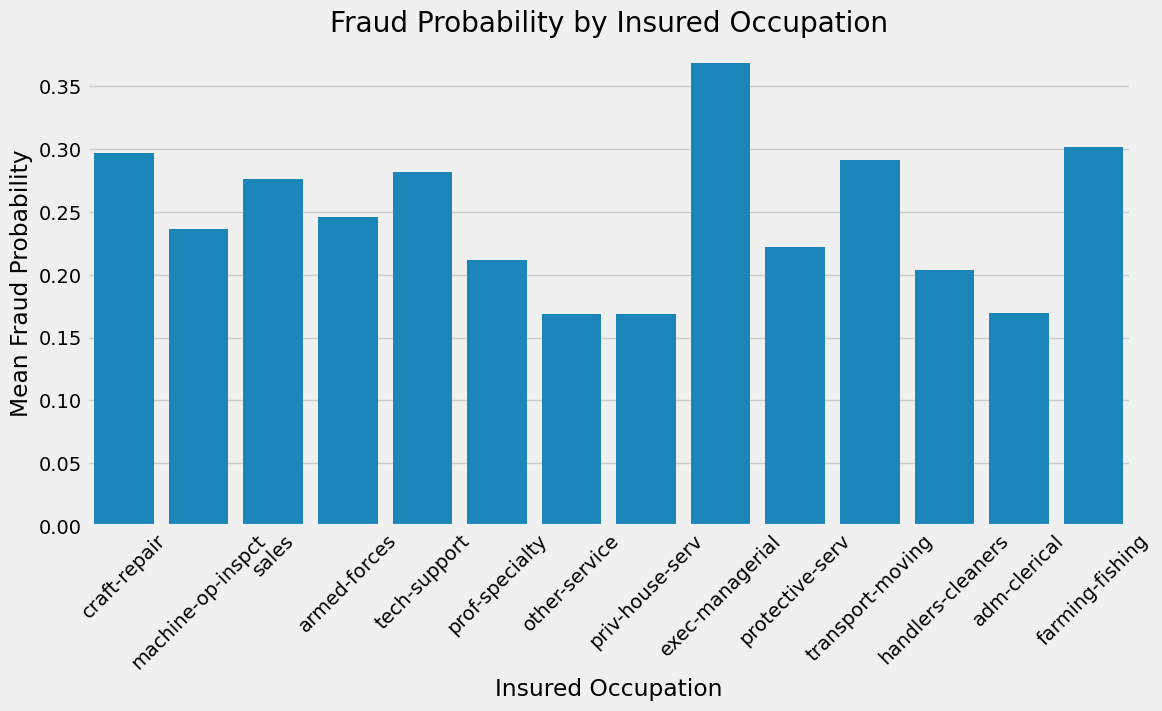

In [1183]:
plt.figure(figsize=(12, 6))
sns.barplot(x='insured_occupation', y='fraud_reported', data=data, estimator=lambda x: x.mean(), ci=None)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.title("Fraud Probability by Insured Occupation")
plt.ylabel("Mean Fraud Probability")
plt.xlabel("Insured Occupation")
plt.show()

In [1184]:
# let's know the relation between insured_occupation and fraud reported

data[['insured_occupation','fraud_reported']].groupby(['insured_occupation'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

insured_occupation  fraud_reported
3     exec-managerial        0.368421
4     farming-fishing        0.301887
2        craft-repair        0.297297
13   transport-moving        0.291667
12       tech-support        0.282051
11              sales        0.276316
1        armed-forces        0.246377
6   machine-op-inspct        0.236559
10    protective-serv        0.222222
9      prof-specialty        0.211765
5   handlers-cleaners        0.203704
0        adm-clerical        0.169231
7       other-service        0.169014
8     priv-house-serv        0.169014

In [1185]:
# Compute mean fraud probability for each insured occupation category
fraud_mean_map = data.groupby('insured_occupation')['fraud_reported'].mean()

# Apply target encoding
data['insured_occupation_encoded'] = data['insured_occupation'].map(fraud_mean_map)

# Verify encoding results
print(data[['insured_occupation', 'insured_occupation_encoded']].head())

  insured_occupation  insured_occupation_encoded
0       craft-repair                    0.297297
1  machine-op-inspct                    0.236559
2              sales                    0.276316
3       armed-forces                    0.246377
4              sales                    0.276316


In [1186]:
data.groupby('insured_education_level', as_index=False)['fraud_reported'].mean().sort_values(by='fraud_reported', ascending=False)

insured_education_level  fraud_reported
6                     PhD        0.264000
4                      MD        0.263889
1                 College        0.262295
3                      JD        0.260870
0               Associate        0.234483
2             High School        0.225000
5                 Masters        0.223776

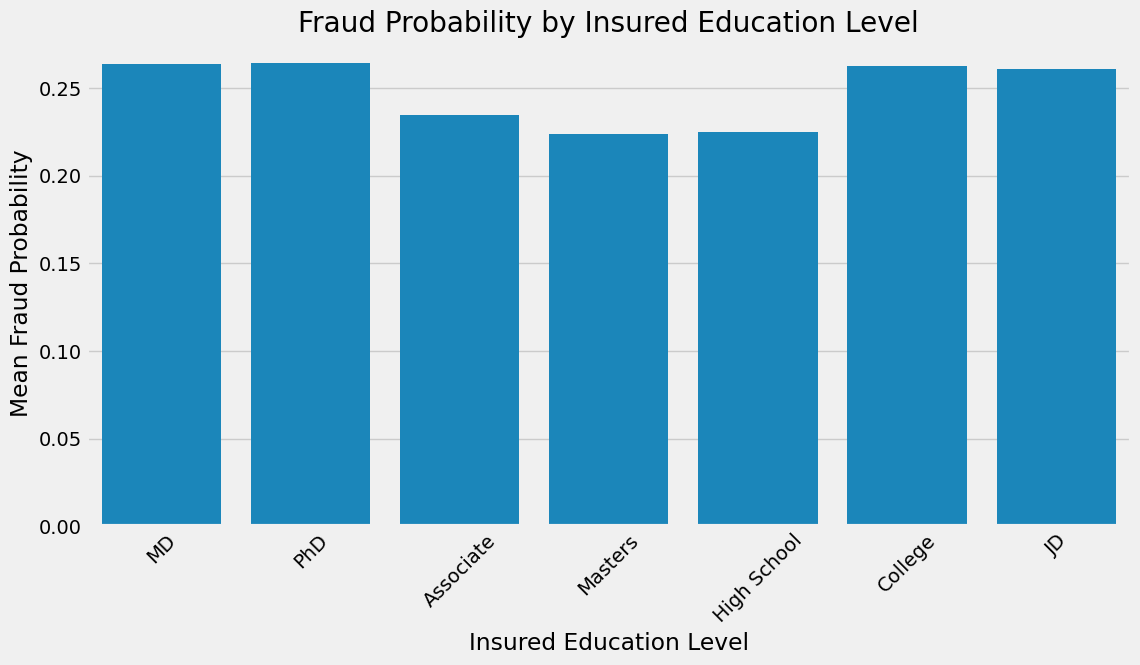

In [1187]:
plt.figure(figsize=(12, 6))
sns.barplot(x='insured_education_level', y='fraud_reported', data=data, estimator=lambda x: x.mean(), ci=None)
plt.xticks(rotation=45)  # Rotates labels for better readability
plt.title("Fraud Probability by Insured Education Level")
plt.ylabel("Mean Fraud Probability")
plt.xlabel("Insured Education Level")
plt.show()

In [1188]:
# let's know the relation of insured_education_level with faud_reported

data[['insured_education_level','fraud_reported']].groupby(['insured_education_level'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

insured_education_level  fraud_reported
6                     PhD        0.264000
4                      MD        0.263889
1                 College        0.262295
3                      JD        0.260870
0               Associate        0.234483
2             High School        0.225000
5                 Masters        0.223776

In [1189]:
# Compute mean fraud probability for each insured education level
fraud_mean_map = data.groupby('insured_education_level')['fraud_reported'].mean()

# Apply target encoding
data['insured_education_level_encoded'] = data['insured_education_level'].map(fraud_mean_map)

# Verify encoding results
print(data[['insured_education_level', 'insured_education_level_encoded']].head())

  insured_education_level  insured_education_level_encoded
0                      MD                         0.263889
1                      MD                         0.263889
2                     PhD                         0.264000
3                     PhD                         0.264000
4               Associate                         0.234483


In [1190]:
data.groupby('insured_sex', as_index=False)['fraud_reported'].mean().sort_values(by='fraud_reported', ascending=False)

insured_sex  fraud_reported
1        MALE        0.261339
0      FEMALE        0.234637

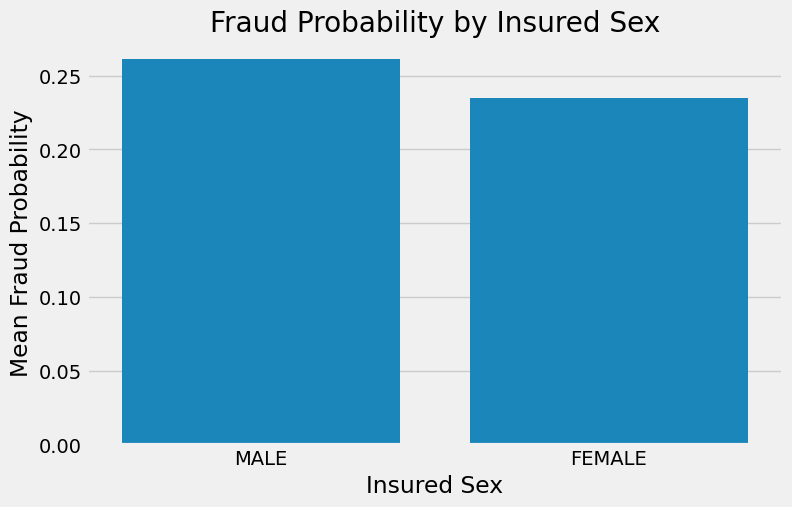

In [1191]:
plt.figure(figsize=(8, 5))
sns.barplot(x='insured_sex', y='fraud_reported', data=data, estimator=lambda x: x.mean(), ci=None)
plt.title("Fraud Probability by Insured Sex")
plt.ylabel("Mean Fraud Probability")
plt.xlabel("Insured Sex")
plt.show()

In [1192]:
# lets know the relation of insured sex and fraud reported

data[['insured_sex','fraud_reported']].groupby(['insured_sex'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)

insured_sex  fraud_reported
1        MALE        0.261339
0      FEMALE        0.234637

In [1193]:
# Compute mean fraud probability for each insured sex category
fraud_mean_map = data.groupby('insured_sex')['fraud_reported'].mean()

# Apply target encoding
data['insured_sex_encoded'] = data['insured_sex'].map(fraud_mean_map)

# Verify encoding results
print(data[['insured_sex', 'insured_sex_encoded']].head())

# Check distribution of encoded values
print(data['insured_sex_encoded'].value_counts())

  insured_sex  insured_sex_encoded
0        MALE             0.261339
1        MALE             0.261339
2      FEMALE             0.234637
3      FEMALE             0.234637
4        MALE             0.261339
insured_sex_encoded
0.234637    537
0.261339    463
Name: count, dtype: int64


In [1194]:
data.groupby('policy_csl', as_index=False)['fraud_reported'].mean().sort_values(by='fraud_reported', ascending=False)

policy_csl  fraud_reported
1    250/500        0.262108
0    100/300        0.257880
2   500/1000        0.216667

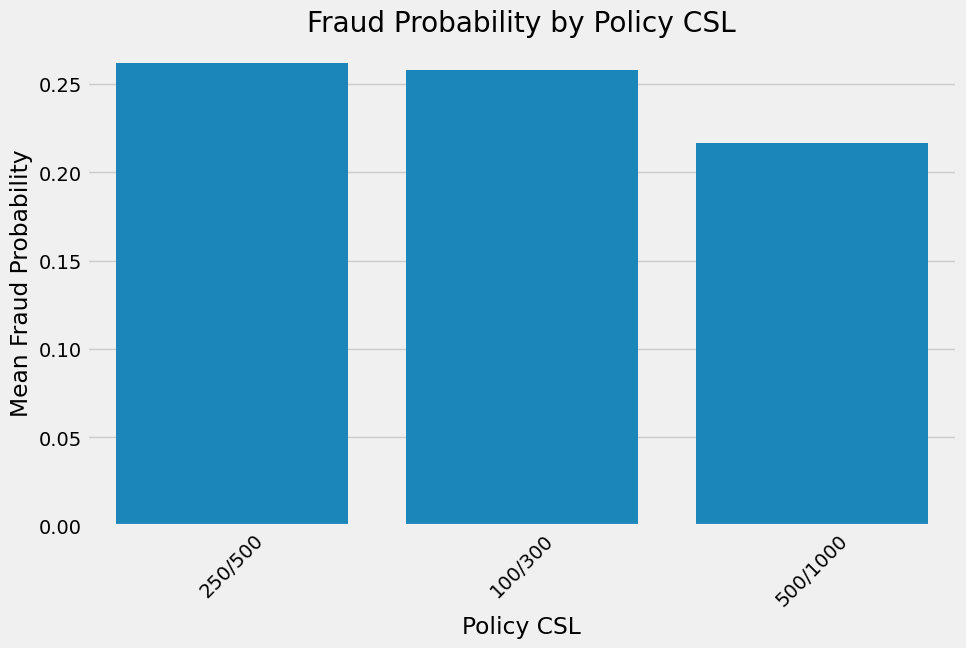

In [1195]:
plt.figure(figsize=(10, 6))
sns.barplot(x='policy_csl', y='fraud_reported', data=data, estimator=lambda x: x.mean(), ci=None)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.title("Fraud Probability by Policy CSL")
plt.ylabel("Mean Fraud Probability")
plt.xlabel("Policy CSL")
plt.show()

In [1196]:
# csl - combined single limit

'''CSL is a single number that describes the predetermined limit for the combined total of the Bodily Injury 
Liability coverage and Property Damage Liability coverage per occurrence or accident.'''

# lets know the relation of policy state and fraud reported

data[['policy_csl','fraud_reported']].groupby(['policy_csl'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)

policy_csl  fraud_reported
1    250/500        0.262108
0    100/300        0.257880
2   500/1000        0.216667

In [1197]:
# Compute mean fraud probability for each policy CSL category
fraud_mean_map = data.groupby('policy_csl')['fraud_reported'].mean()

# Apply target encoding
data['policy_csl_encoded'] = data['policy_csl'].map(fraud_mean_map)

# Verify encoding results
print(data[['policy_csl', 'policy_csl_encoded']].head())

  policy_csl  policy_csl_encoded
0    250/500            0.262108
1    250/500            0.262108
2    100/300            0.257880
3    250/500            0.262108
4   500/1000            0.216667


In [1198]:
data.groupby('policy_state', as_index=False)['fraud_reported'].mean().sort_values(by='fraud_reported', ascending=False)

policy_state  fraud_reported
2           OH        0.258523
1           IN        0.254839
0           IL        0.227811

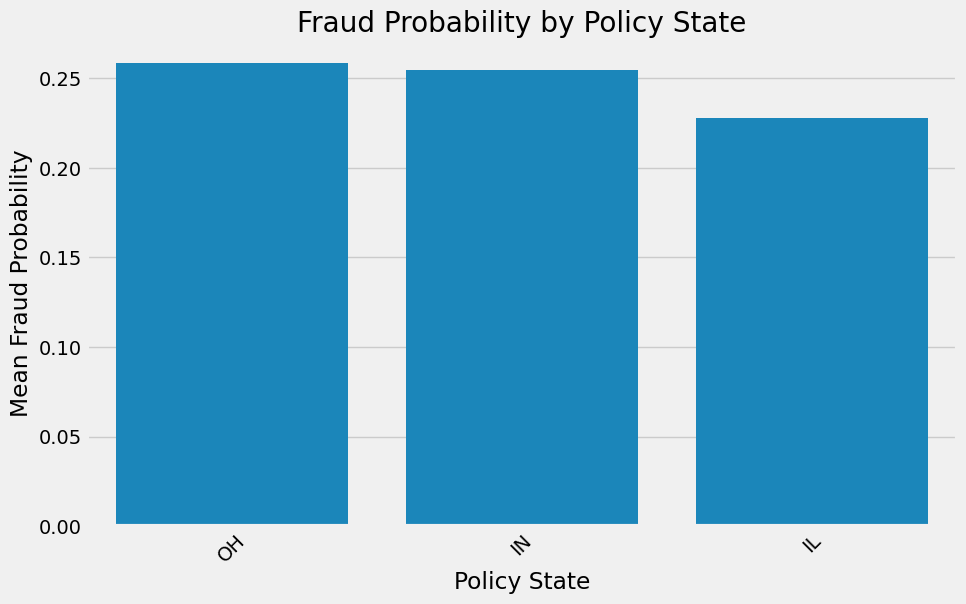

In [1199]:
plt.figure(figsize=(10, 6))
sns.barplot(x='policy_state', y='fraud_reported', data=data, estimator=lambda x: x.mean(), ci=None)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.title("Fraud Probability by Policy State")
plt.ylabel("Mean Fraud Probability")
plt.xlabel("Policy State")
plt.show()

In [1200]:

# lets know the relation of policy state and fraud reported

data[['policy_state','fraud_reported']].groupby(['policy_state'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)


policy_state  fraud_reported
2           OH        0.258523
1           IN        0.254839
0           IL        0.227811

In [1201]:
# Compute mean fraud probability for each policy state category
fraud_mean_map = data.groupby('policy_state')['fraud_reported'].mean()

# Apply target encoding
data['policy_state_encoded'] = data['policy_state'].map(fraud_mean_map)

# Verify encoding results
print(data[['policy_state', 'policy_state_encoded']].head())

  policy_state  policy_state_encoded
0           OH              0.258523
1           IN              0.254839
2           OH              0.258523
3           IL              0.227811
4           IL              0.227811


In [1202]:
# Drop unnecessary columns safely
columns_to_drop = ['policy_number', 'policy_bind_date', 'incident_date', 'incident_location', 'auto_model']
data = data.drop(columns=columns_to_drop, errors='ignore')  # Avoids errors if a column doesn’t exist

# Check remaining columns
print(data.columns)

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_year', 'fraud_reported', '_c39', 'policy_bind_day',
       'policy_bind_month', 'policy_bind_year', 'auto_make_encoded',
       'property_damage_encoded', 'incident_city_encoded',
       'incident_state_encoded', 'authorities_contacted_encoded',
       'incident_severity_encoded', 'collision_type_en

In [1203]:
# Define independent and dependent variables
X = data.drop(columns=['fraud_reported'], errors='ignore')  # Ensures robustness if the column is missing
y = data['fraud_reported']

# Display dataset shapes
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (1000, 57)
Shape of y: (1000,)


In [1204]:
from sklearn.model_selection import train_test_split

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Checking dataset shapes
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (800, 57)
Shape of X_test: (200, 57)
Shape of y_train: (800,)
Shape of y_test: (200,)


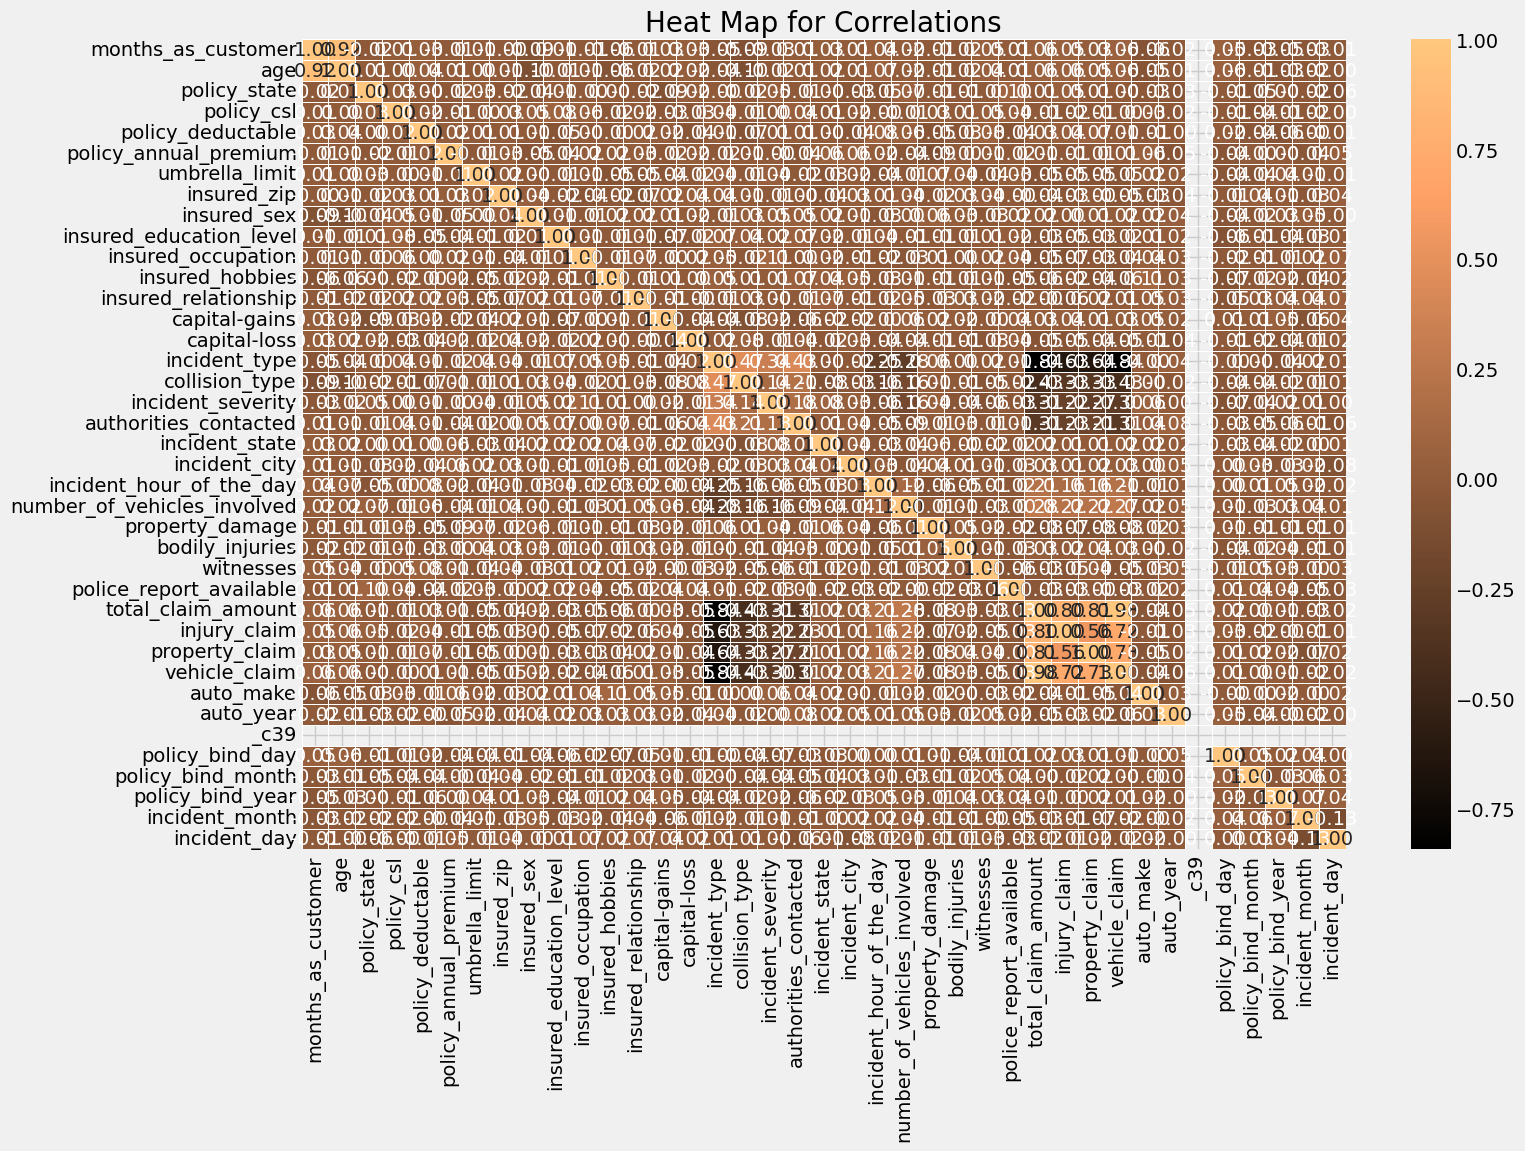

In [1205]:
# Set figure size
plt.figure(figsize=(15, 10))

# Generate heatmap with improved styling
sns.heatmap(x_train.corr(), cmap='copper', annot=True, fmt=".2f", linewidths=0.5)

# Add title with better formatting
plt.title('Heat Map for Correlations', fontsize=20)

# Display the plot
plt.show()

## Modelling with Ensemble of Samplers

**Random Forest Classifier**

Training Accuracy:  0.99875
Testing Accuarcy:  0.705
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       151
           1       0.36      0.27      0.31        49

    accuracy                           0.70       200
   macro avg       0.57      0.56      0.56       200
weighted avg       0.68      0.70      0.69       200



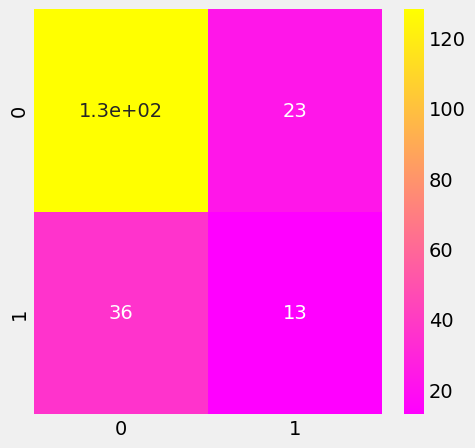

In [1206]:
# Random Forest Classifier

from imblearn.ensemble import BalancedRandomForestClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
                 

model = BalancedRandomForestClassifier(n_estimators = 100, random_state = 0)

model.fit(x_train, y_train)
y_pred_rf = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred_rf)
print(cr)

# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, cmap = 'spring')
plt.show()

**Easy Ensemble Classifier**

Training Accuracy:  0.6725
Testing Accuracy:  0.55
              precision    recall  f1-score   support

           0       0.79      0.56      0.65       151
           1       0.28      0.53      0.37        49

    accuracy                           0.55       200
   macro avg       0.53      0.54      0.51       200
weighted avg       0.66      0.55      0.58       200



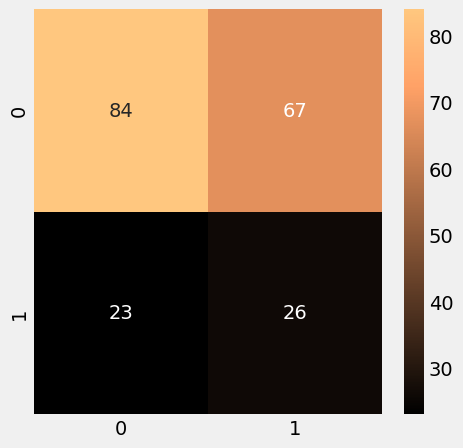

In [1207]:
# # Easy Ensemble Classifier

# from imblearn.ensemble import EasyEnsembleClassifier 
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
                 

# model1 = EasyEnsembleClassifier(n_estimators = 100, random_state = 0)

# model1.fit(x_train, y_train)
# y_pred_ef = model1.predict(x_test)

# print("Training Accuracy: ", model1.score(x_train, y_train))
# print('Testing Accuarcy: ', model1.score(x_test, y_test))

# # making a classification report
# cr = classification_report(y_test,  y_pred_ef)
# print(cr)

# # making a confusion matrix
# cm = confusion_matrix(y_test, y_pred_ef)
# sns.heatmap(cm, annot = True, cmap = 'copper')
# plt.show()
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Impute missing values (you can use 'mean', 'median', or 'most_frequent' strategies)
imputer = SimpleImputer(strategy='mean')  # Change strategy if necessary

# Apply the imputer to both X and y
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Initialize the model
model1 = EasyEnsembleClassifier(n_estimators=100, random_state=0)

# Fit the model on the imputed data
model1.fit(x_train_imputed, y_train)
y_pred_ef = model1.predict(x_test_imputed)

# Print the results
print("Training Accuracy: ", model1.score(x_train_imputed, y_train))
print('Testing Accuracy: ', model1.score(x_test_imputed, y_test))

# Classification report
cr = classification_report(y_test, y_pred_ef)
print(cr)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_ef)
sns.heatmap(cm, annot=True, cmap='copper')
plt.show()


**Bagging Classifier**

Training Accuracy:  0.96375
Testing Accuracy:  0.665
              precision    recall  f1-score   support

           0       0.76      0.81      0.79       151
           1       0.26      0.20      0.23        49

    accuracy                           0.67       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.64      0.67      0.65       200



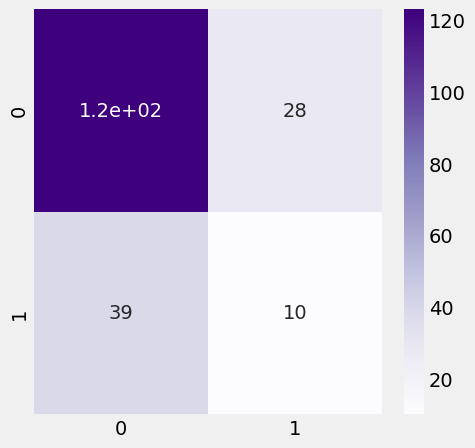

In [1208]:
# # Random Forest with Bagging Classifier

# from imblearn.ensemble import BalancedBaggingClassifier 
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# from sklearn.ensemble import RandomForestClassifier
                 

# model2 = BalancedBaggingClassifier(base_estimator = RandomForestClassifier(),
#                                  sampling_strategy = 'auto',
#                                  replacement = False,
#                                  random_state = 0)

# model2.fit(x_train, y_train)
# y_pred_bc = model2.predict(x_test)

# print("Training Accuracy: ", model2.score(x_train, y_train))
# print('Testing Accuarcy: ', model2.score(x_test, y_test))

# # making a classification report
# cr = classification_report(y_test,  y_pred_bc)
# print(cr)

# # making a confusion matrix
# cm = confusion_matrix(y_test, y_pred_bc)
# sns.heatmap(cm, annot = True, cmap = 'Purples')
# plt.show()
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Impute missing values (you can use 'mean', 'median', or 'most_frequent' strategies)
imputer = SimpleImputer(strategy='mean')  # Replace 'mean' with another strategy if necessary

# Apply the imputer to both X and y
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Initialize the model (replace classifier with estimator)
model2 = BalancedBaggingClassifier(estimator=RandomForestClassifier(),
                                   sampling_strategy='auto',
                                   replacement=False,
                                   random_state=0)

# Fit the model on the imputed data
model2.fit(x_train_imputed, y_train)
y_pred_bc = model2.predict(x_test_imputed)

# Print the results
print("Training Accuracy: ", model2.score(x_train_imputed, y_train))
print('Testing Accuracy: ', model2.score(x_test_imputed, y_test))

# Classification report
cr = classification_report(y_test, y_pred_bc)
print(cr)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_bc)
sns.heatmap(cm, annot=True, cmap='Purples')
plt.show()



**Boosting the Predictions of above Models**

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       151
           1       0.38      0.27      0.31        49

    accuracy                           0.71       200
   macro avg       0.58      0.56      0.57       200
weighted avg       0.68      0.71      0.70       200



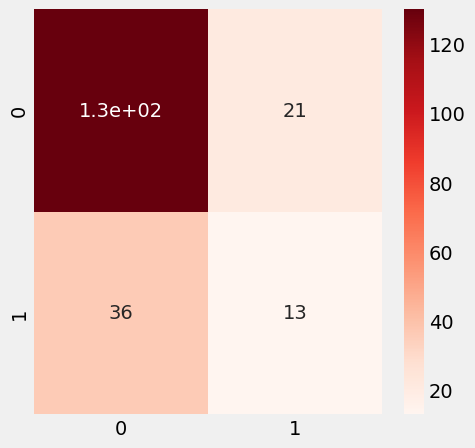

In [1209]:
# boosting

y_pred = y_pred_rf*0.5 + y_pred_ef*0.2 + y_pred_bc*0.3

y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0

# making a classification report
cr = classification_report(y_test,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Reds')
plt.show()

**Voting Classifier**

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       151
           1       0.20      0.20      0.20        49

    accuracy                           0.60       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.61      0.60      0.61       200



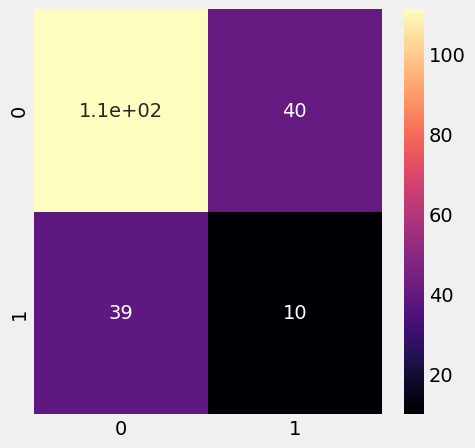

In [1210]:
# from sklearn.ensemble import VotingClassifier

# vote_est = [ 
#     ('brf', BalancedRandomForestClassifier()),
#     ('bc', BalancedBaggingClassifier()),
#     ('eec',EasyEnsembleClassifier())]

# voting = VotingClassifier(estimators = vote_est , voting = 'soft')
# voting.fit(x_train, y_train)

# y_pred = voting.predict(x_test).astype(int)

# # making a classification report
# cr = classification_report(y_test,  y_pred)
# print(cr)

# # making a confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot = True, cmap = 'magma')
# plt.show()
from sklearn.impute import SimpleImputer
from sklearn.ensemble import VotingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, BalancedBaggingClassifier, EasyEnsembleClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create an imputer to handle missing values
imputer = SimpleImputer(strategy='mean')  # You can use 'median' or 'most_frequent' as needed

# Fit the imputer on the training data and transform both X_train and X_test
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Define the voting classifier with your estimators
vote_est = [ 
    ('brf', BalancedRandomForestClassifier()),
    ('bc', BalancedBaggingClassifier()),
    ('eec', EasyEnsembleClassifier())
]

voting = VotingClassifier(estimators=vote_est, voting='soft')

# Fit the voting classifier on the imputed data
voting.fit(x_train_imputed, y_train)

# Make predictions
y_pred = voting.predict(x_test_imputed).astype(int)

# Classification report
cr = classification_report(y_test, y_pred)
print(cr)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='magma')
plt.show()


## Applying Sampling Techniques

**Under Sampling**

In [1211]:
y.value_counts()

fraud_reported
0    753
1    247
Name: count, dtype: int64

In [1212]:
frauds = np.array(data[data['fraud_reported'] == 0].index)
no_frauds = len(frauds)

print(no_frauds)

753


In [1213]:
normal_indices = data[data['fraud_reported'] == 1]
no_normal_indices = len(normal_indices)

print(no_normal_indices)

247


In [1214]:

random_normal_indices = np.random.choice(no_normal_indices, size = no_frauds, replace = True)
random_normal_indices = np.array(random_normal_indices)

print(len(random_normal_indices))

753


In [1215]:
under_sample = np.concatenate([frauds, random_normal_indices])
print(len(under_sample))

1506


In [1216]:

# creating the undersample data

undersample_data = data.iloc[under_sample, :]

In [1217]:
# splitting the undersample dataset into x and y sets

x_u = undersample_data.iloc[:, undersample_data.columns != 'fraud_reported'] 
y_u = undersample_data.iloc[:, undersample_data.columns == 'fraud_reported']

print(x_u.shape)
print(y_u.shape)

(1506, 57)
(1506, 1)


In [1218]:
from sklearn.model_selection import train_test_split

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_u, y_u, test_size = 0.2, random_state = 0)

print(x_train1.shape)
print(y_train1.shape)
print(x_test1.shape)

(1204, 57)
(1204, 1)
(302, 57)


In [1219]:
# Strip whitespace and carriage returns from string columns
x_train1 = x_train1.applymap(lambda x: x.strip() if isinstance(x, str) else x)
x_test1 = x_test1.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# OPTIONAL: Check for remaining non-numeric columns
non_numeric_cols = x_train1.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

# Convert categorical variables using one-hot encoding (if needed)
x_train1 = pd.get_dummies(x_train1, drop_first=True)
x_test1 = pd.get_dummies(x_test1, drop_first=True)

# Align columns in case dummy encoding creates mismatched columns
x_train1, x_test1 = x_train1.align(x_test1, join='left', axis=1, fill_value=0)

# Now you can scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train1 = sc.fit_transform(x_train1)
x_test1 = sc.transform(x_test1)

Non-numeric columns: Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make',
       'incident_weekday'],
      dtype='object')


In [1220]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train1 = sc.fit_transform(x_train1)
x_test1 = sc.transform(x_test1)

Training Accuracy:  1.0
Testing Accuarcy:  0.9933774834437086


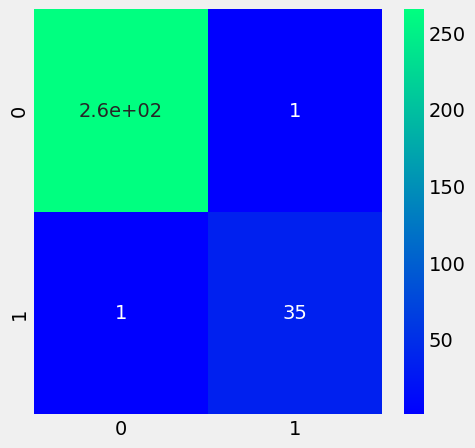

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       0.97      0.97      0.97        36

    accuracy                           0.99       302
   macro avg       0.98      0.98      0.98       302
weighted avg       0.99      0.99      0.99       302



In [1221]:
from sklearn.ensemble import RandomForestClassifier

model_u = RandomForestClassifier()
model_u.fit(x_train1, y_train1)

y_pred = model_u.predict(x_test1)

print("Training Accuracy: ", model_u.score(x_train1, y_train1))
print('Testing Accuarcy: ', model_u.score(x_test1, y_test1))

# confusion matrix
cm = confusion_matrix(y_test1, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'winter')
plt.show()

# classification report
cr = classification_report(y_test1, y_pred)
print(cr)

**Over Sampling with SMOTE** 

In [1222]:
# from imblearn.over_sampling import SMOTE

# x_resample, y_resample  = SMOTE().fit_sample(x, y.values.ravel())

# print(x_resample.shape)
# print(y_resample.shape)
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Create an imputer to fill missing values (e.g., with the mean of each column)
imputer = SimpleImputer(strategy='mean')

# Impute missing values in the features (X)
x_imputed = imputer.fit_transform(x)

# Apply SMOTE after imputing missing values
x_resample, y_resample = SMOTE().fit_resample(x_imputed, y.values.ravel())

print(x_resample.shape)
print(y_resample.shape)


(1506, 38)
(1506,)


In [1223]:
from sklearn.model_selection import train_test_split

x_train2, x_test2, y_train2, y_test2 = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

print(x_train2.shape)
print(y_train2.shape)
print(x_test2.shape)
print(y_test2.shape)

(1204, 38)
(1204,)
(302, 38)
(302,)


In [1224]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train2 = sc.fit_transform(x_train2)
x_test2 = sc.transform(x_test2)

Training Accuracy:  1.0
Testing Accuarcy:  0.890728476821192


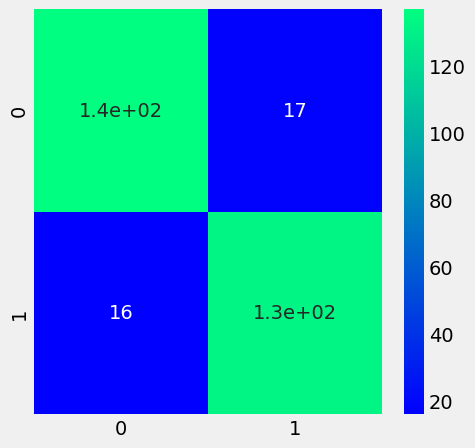

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       154
           1       0.89      0.89      0.89       148

    accuracy                           0.89       302
   macro avg       0.89      0.89      0.89       302
weighted avg       0.89      0.89      0.89       302



In [1225]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model_o = RandomForestClassifier()
model_o.fit(x_train2, y_train2)

y_pred = model_o.predict(x_test2)

print("Training Accuracy: ", model_o.score(x_train2, y_train2))
print('Testing Accuarcy: ', model_o.score(x_test2, y_test2))

# confusion matrix
cm = confusion_matrix(y_test2, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'winter')
plt.show()

# classification report
cr = classification_report(y_test2, y_pred)
print(cr)

## Model Explanation for Random Forest Classifier

In [1226]:
# let's check the importance of each attributes

from eli5.sklearn import PermutationImportance


perm = PermutationImportance(model, random_state = 0).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

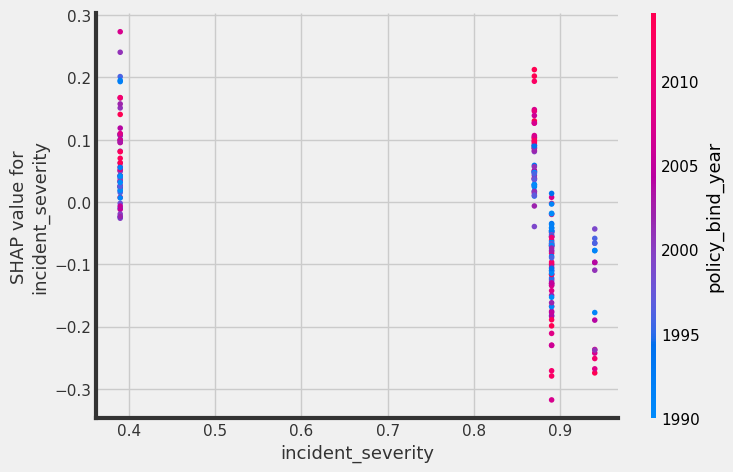

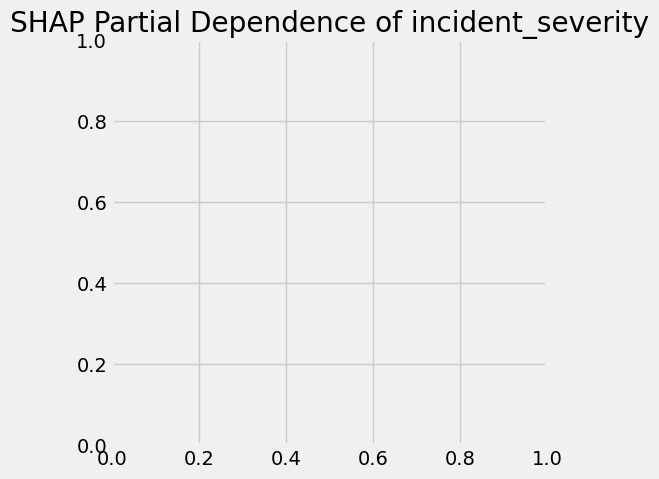

In [1227]:
import shap
import xgboost as xgb
import matplotlib.pyplot as plt

# Train your XGBoost model
model = xgb.XGBClassifier()  # Use XGBRegressor() if doing regression
model.fit(x_train, y_train)

# Initialize SHAP explainer for XGBoost
explainer = shap.TreeExplainer(model)

# Generate SHAP values for the test set
shap_values = explainer.shap_values(x_test)

# Plot SHAP partial dependence for a specific feature
feat_name = 'incident_severity'

# Create a SHAP dependence plot for a single feature
shap.dependence_plot(feat_name, shap_values, x_test)

# Show the plot
plt.title(f"SHAP Partial Dependence of {feat_name}")
plt.show()


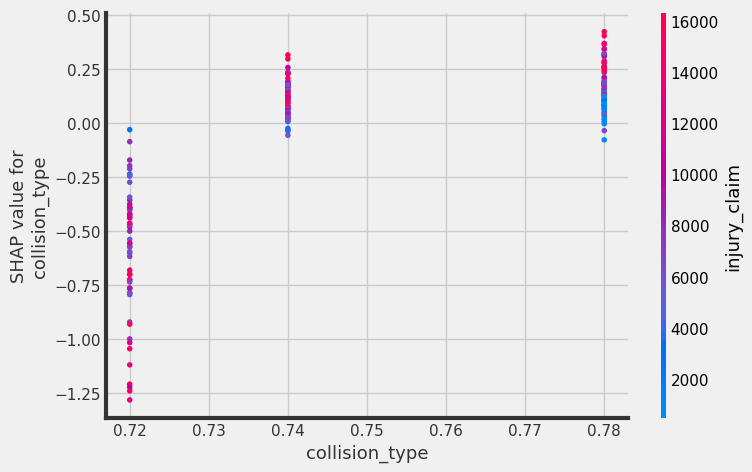

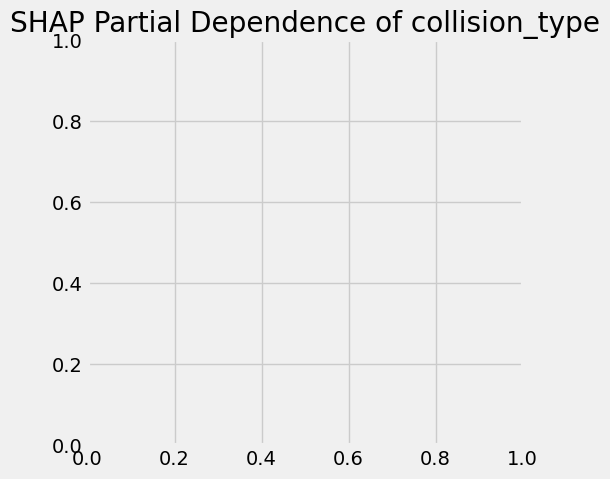

In [1228]:
import shap
import xgboost as xgb
import matplotlib.pyplot as plt

# Train your model (assuming XGBoost classifier is used)
model = xgb.XGBClassifier()
model.fit(x_train, y_train)

# Initialize SHAP explainer for XGBoost
explainer = shap.TreeExplainer(model)

# Generate SHAP values for the test set
shap_values = explainer.shap_values(x_test)

# Create a SHAP dependence plot for the feature
feat_name = 'collision_type'
shap.dependence_plot(feat_name, shap_values, x_test)

# Show the plot
plt.title(f"SHAP Partial Dependence of {feat_name}")
plt.show()


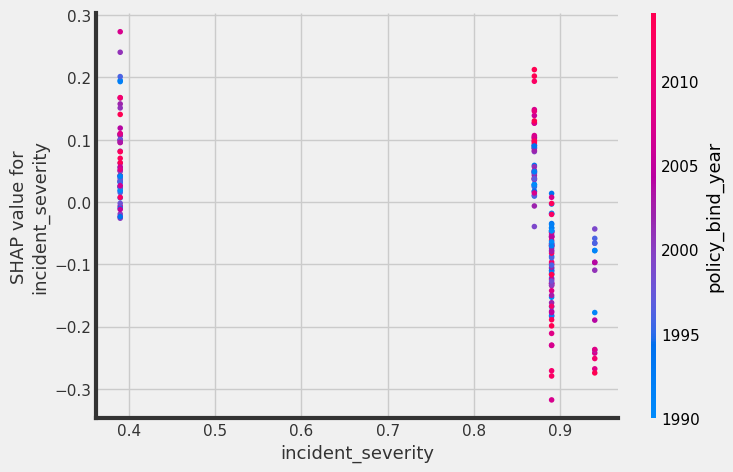

In [1229]:
import shap
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming you have already trained the model
model = xgb.XGBClassifier()
model.fit(x_train, y_train)

# Initialize SHAP explainer for tree-based models
explainer = shap.TreeExplainer(model)

# Get SHAP values for your dataset
shap_values = explainer.shap_values(x_test)

# Plot the SHAP dependence plot
shap.dependence_plot('incident_severity', shap_values, x_test)

# Show the plot
plt.show()


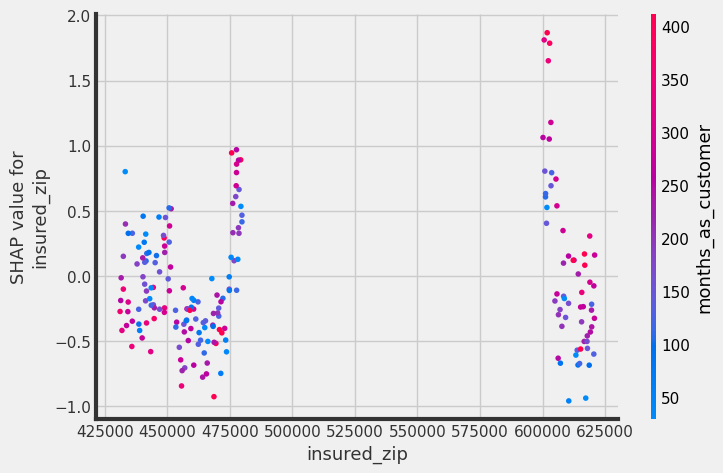

In [1230]:
import shap
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming your model is trained and you have the data
model = xgb.XGBClassifier()
model.fit(x_train, y_train)

# Initialize SHAP explainer for tree-based models
explainer = shap.TreeExplainer(model)

# Get SHAP values for your test data
shap_values = explainer.shap_values(x_test)

# Plot SHAP dependence plot for a feature
shap.dependence_plot('insured_zip', shap_values, x_test)

# Show the plot
plt.show()

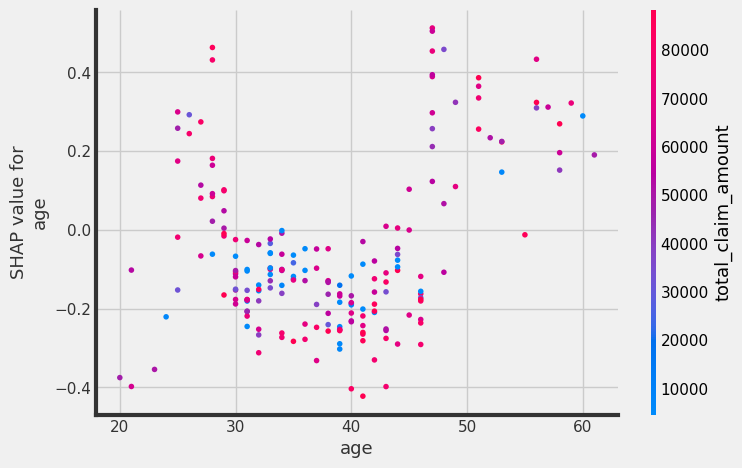

In [1231]:
import shap
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming you have your XGBoost model already trained (if not, train it)
# model = xgb.XGBClassifier()
# model.fit(x_train, y_train)

# Initialize SHAP explainer for tree-based models (XGBoost)
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for your test dataset
shap_values = explainer.shap_values(x_test)

# Plot the SHAP dependence plot for the 'age' feature
shap.dependence_plot('age', shap_values, x_test)

# Show the plot
plt.show()

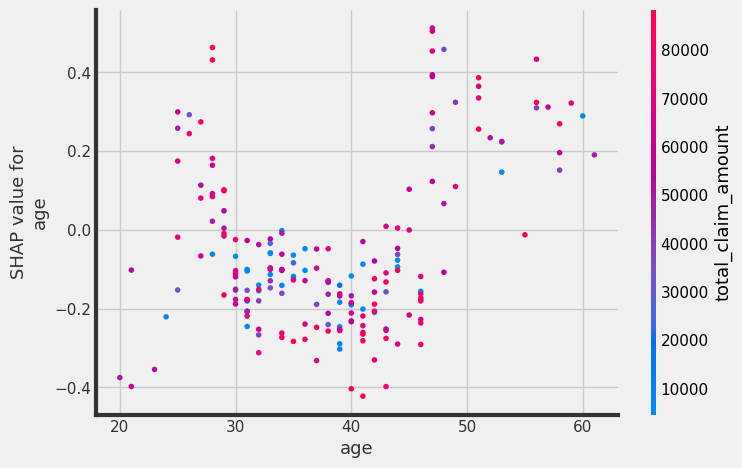

In [1232]:
import shap
import matplotlib.pyplot as plt

# Calculate SHAP values for your test dataset
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)

# Visualize SHAP dependence plot for a specific feature (e.g., 'age')
shap.dependence_plot('age', shap_values, x_test)

plt.show()
